In [3]:
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time

%run ..\..\..\funcoes_base_global\read_tags.py
%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [4]:
def path(name):
    path = os.path.join('..','..','1_dados_raw','sensores','out',name)
    return(path)

In [5]:
def estatisticas(df):
    media = df[df.columns[0::]].mean()
    maximo = df[df.columns[0::]].max()
    minimo = df[df.columns[0::]].min()
    percentNan = df[df.columns[0::]].isna().sum() / df.shape[0] * 100
    stats = pd.concat([media,minimo,maximo,percentNan],axis=1)
    stats.columns = ['mean','min','max','percentNan']
    return stats

In [6]:
def qualidade(data):
    for tag in data.columns[data.columns.str.contains('_quality')]:
        total = data[tag].count()
        good = data[tag].loc[data[tag] == 'Good'].count()
        bad = data[tag].loc[data[tag] == 'Bad'].count()
        print(tag, 'Qtd good:', good, 'Qtd bad:', bad, 'Good Percent:',(good/total)*100, '%')

In [7]:
#faltando ['PIC3002.PV', 'AI25121.PV']

#24    AI25121.PV
#25    AI25131.PV
#26    AI25141.PV
#27    AI25151.PV
#28    AI25161.PV
#29    AI25171.PV
#30    AI25181.PV
#31    AI25191.PV
#32    AI23422.PV
#33    AI23432.PV
#34    AI23442.PV
#35    AI23452.PV
#36    AI23462.PV
#37    AI23472.PV
#38    AI23482.PV
#39    AI23492.PV
#40    AI23212.PV
#42  PIC3002.MODE
#43   PIC3002.OUT
#44    PIC3002.PV
#45    PIC3002.SP
#46     PI3417.PV
#47    produtopol
#48  FIC2601.MODE
#49   FIC2601.OUT
#50    FIC2601.PV
#51    FIC2601.SP
#52     TI3405.PV
#53     TI3406.PV
#54     TI3407.PV
#55     TI3408.PV


tags = ['Date',
'TI3401.PV',
'TI3402.PV',
'TI3403.PV',
'TI3404.PV',
'TI3409.PV',
'XI3403.PV',
'XI3404.PV',
'XI3405.PV',
'XI3406.PV',
'PI3401.PV',
'PI3406.PV',
'FI3402.PV',
'JI3401.PV']

In [ ]:
#importa todo o dataframe
name = 'data.csv' 

tempo = time.time()
data = pd.read_csv(path(name))
data.index = data.Date
data.index = pd.to_datetime(data.index)
data = data.drop('Date', axis =1)

print(time.time() - tempo)

In [8]:
#importa tags
name = 'data.csv' 

tempo = time.time()
data = pd.read_csv(path(name), usecols = tags)
data.index = data.Date
data.index = pd.to_datetime(data.index)
data = data.drop('Date', axis =1)

print(time.time() - tempo)

21.039348602294922


In [7]:
data.head()

,FI3402.PV,JI3401.PV,PI3401.PV,PI3406.PV,TI3401.PV,TI3402.PV,TI3403.PV,TI3404.PV,TI3409.PV,XI3403.PV,XI3404.PV,XI3405.PV,XI3406.PV
Date,,,,,,,,,,,,,
2009-01-01 00:00:00,0.0,0.0,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:01:00,0.0,0.0,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:02:00,0.0,0.0,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:03:00,0.0,0.0,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:04:00,0.0,0.0,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tempo: 7.89386510848999


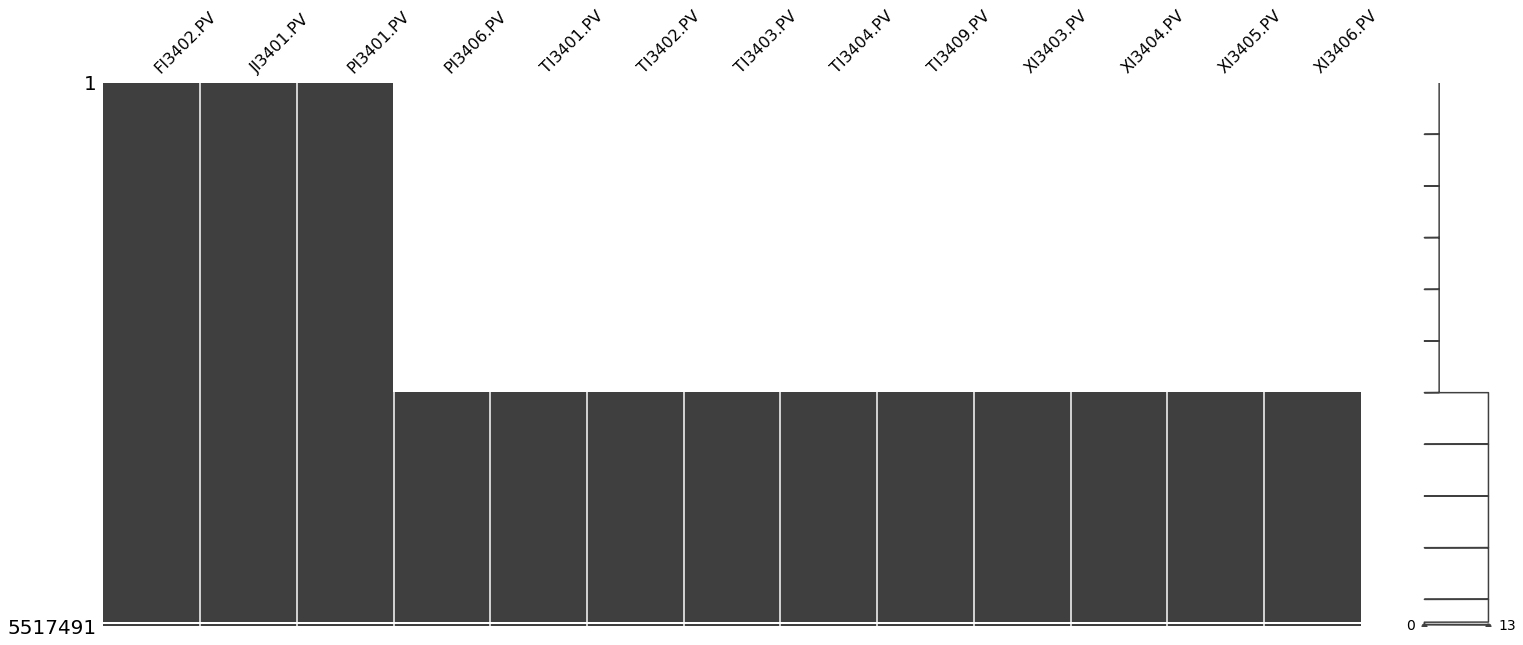

In [14]:
tempo = time.time()
msno.matrix(data[data.columns[~data.columns.str.contains('_quality')]])
print('Tempo:',time.time() - tempo)

In [11]:
#data[data.columns[~data.columns.str.contains('_quality')]].columns[16]

In [9]:
data.index.max()

Timestamp('2019-07-10 00:00:00')

In [10]:
data.index.min()

Timestamp('2009-01-01 00:00:00')

In [11]:
data[data.columns[~data.columns.str.contains('_quality')]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5517491 entries, 2009-01-01 00:00:00 to 2019-07-10 00:00:00
Data columns (total 13 columns):
FI3402.PV    float64
JI3401.PV    float64
PI3401.PV    float64
PI3406.PV    float64
TI3401.PV    float64
TI3402.PV    float64
TI3403.PV    float64
TI3404.PV    float64
TI3409.PV    float64
XI3403.PV    float64
XI3404.PV    float64
XI3405.PV    float64
XI3406.PV    float64
dtypes: float64(13)
memory usage: 589.3 MB


In [12]:
descricao = data[data.columns[~data.columns.str.contains('_quality')]].describe()
descricao

,FI3402.PV,JI3401.PV,PI3401.PV,PI3406.PV,TI3401.PV,TI3402.PV,TI3403.PV,TI3404.PV,TI3409.PV,XI3403.PV,XI3404.PV,XI3405.PV,XI3406.PV
count,5.494078e+06,5.494078e+06,5.494078e+06,2.348038e+06,2.348037e+06,2.348037e+06,2.348037e+06,2.348037e+06,2.348037e+06,2.348039e+06,2.348039e+06,2.348039e+06,2.348039e+06
mean,8.647618e+00,4.455555e+02,1.574624e+00,2.361637e+01,9.698310e+01,9.662704e+01,1.337422e+02,1.298164e+02,4.683289e+01,4.413415e+00,5.201750e+00,1.775361e+00,4.293765e+00
std,4.867872e+00,1.852971e+02,6.582263e-01,1.001146e+01,2.807878e+01,2.917731e+01,3.731538e+01,4.244978e+01,2.148920e+01,1.599987e+00,1.878491e+00,6.951886e-01,1.598024e+00
min,0.000000e+00,0.000000e+00,-5.580000e-01,-8.000000e-01,-4.000000e+00,-6.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,-4.000000e-01,-4.000000e-01,-4.000000e-01,-4.000000e-01
25%,6.503000e+00,4.692020e+02,1.377000e+00,2.699400e+01,9.800000e+01,9.800000e+01,1.390000e+02,1.380000e+02,4.000000e+01,4.729000e+00,4.936000e+00,1.900000e+00,4.010000e+00
50%,8.902000e+00,5.142440e+02,1.656000e+00,2.791400e+01,1.059840e+02,1.040000e+02,1.440000e+02,1.440000e+02,4.300400e+01,4.949000e+00,5.581000e+00,2.017000e+00,4.563000e+00
75%,1.187200e+01,5.448820e+02,1.984000e+00,2.833800e+01,1.110000e+02,1.090000e+02,1.489950e+02,1.490000e+02,4.700000e+01,5.120000e+00,6.285000e+00,2.104000e+00,5.227000e+00
max,2.541300e+01,1.071735e+03,6.180000e+00,3.193500e+01,2.040000e+02,2.120000e+02,2.040000e+02,2.130000e+02,1.200000e+02,1.986600e+01,1.987100e+01,2.040000e+01,1.869700e+01


In [13]:
estatisticas(data)

,mean,min,max,percentNan
FI3402.PV,8.647618,0.000,25.413,0.424341
JI3401.PV,445.555491,0.000,1071.735,0.424341
PI3401.PV,1.574624,-0.558,6.180,0.424341
PI3406.PV,23.616373,-0.800,31.935,57.443737
TI3401.PV,96.983103,-4.000,204.000,57.443755
TI3402.PV,96.627039,-6.000,212.000,57.443755
TI3403.PV,133.742206,-4.000,204.000,57.443755
TI3404.PV,129.816411,-6.000,213.000,57.443755
TI3409.PV,46.832888,-4.000,120.000,57.443755
XI3403.PV,4.413415,-0.400,19.866,57.443719


In [119]:
#export estatistica
data_estatistica = estatisticas(data)
data_estatistica.to_excel('estatistica.xlsx')

In [ ]:
for tag in tags:
    sns.distplot(data[tag].dropna())
    plt.figure()

In [99]:
qualidade(data)

Tempo: 32.750706911087036


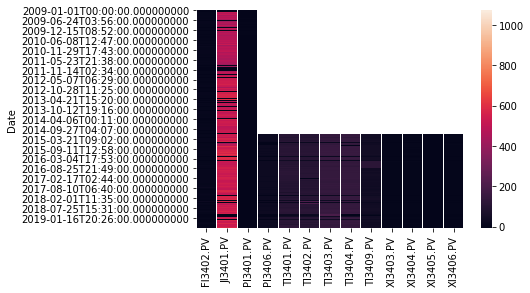

In [15]:
tempo = time.time()
sns.heatmap(data)
print('Tempo:',time.time() - tempo)

### Plot Tags Rolling

(5517491, 1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


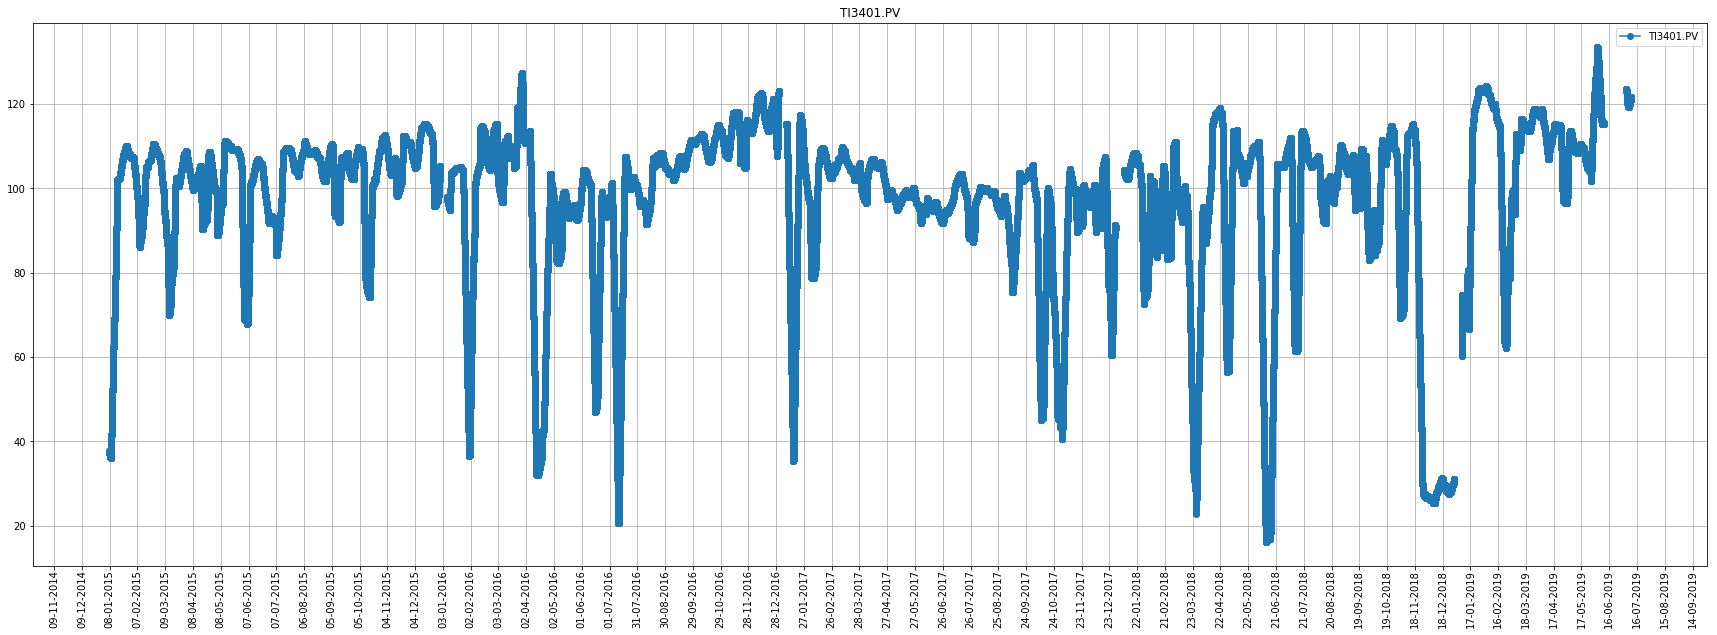

(5517491, 1)


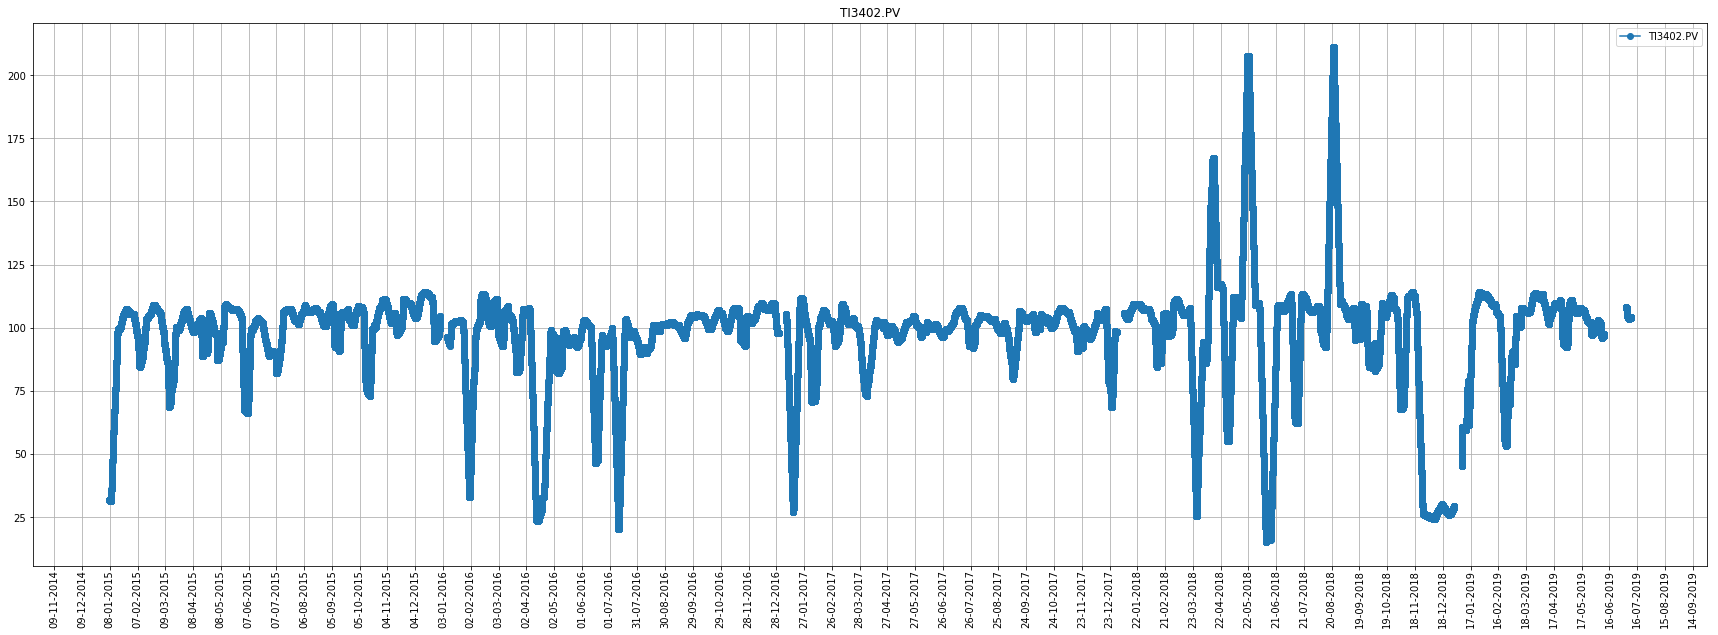

(5517491, 1)


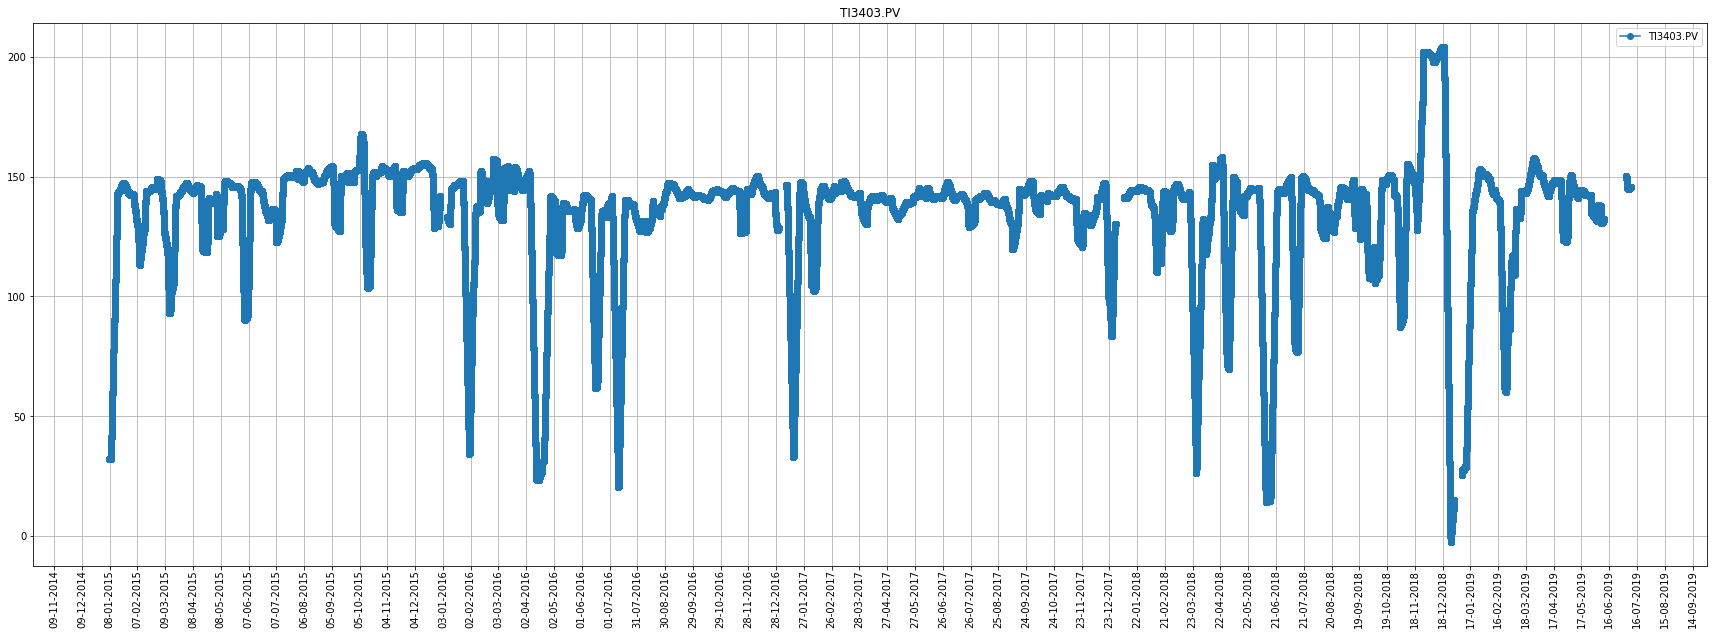

(5517491, 1)


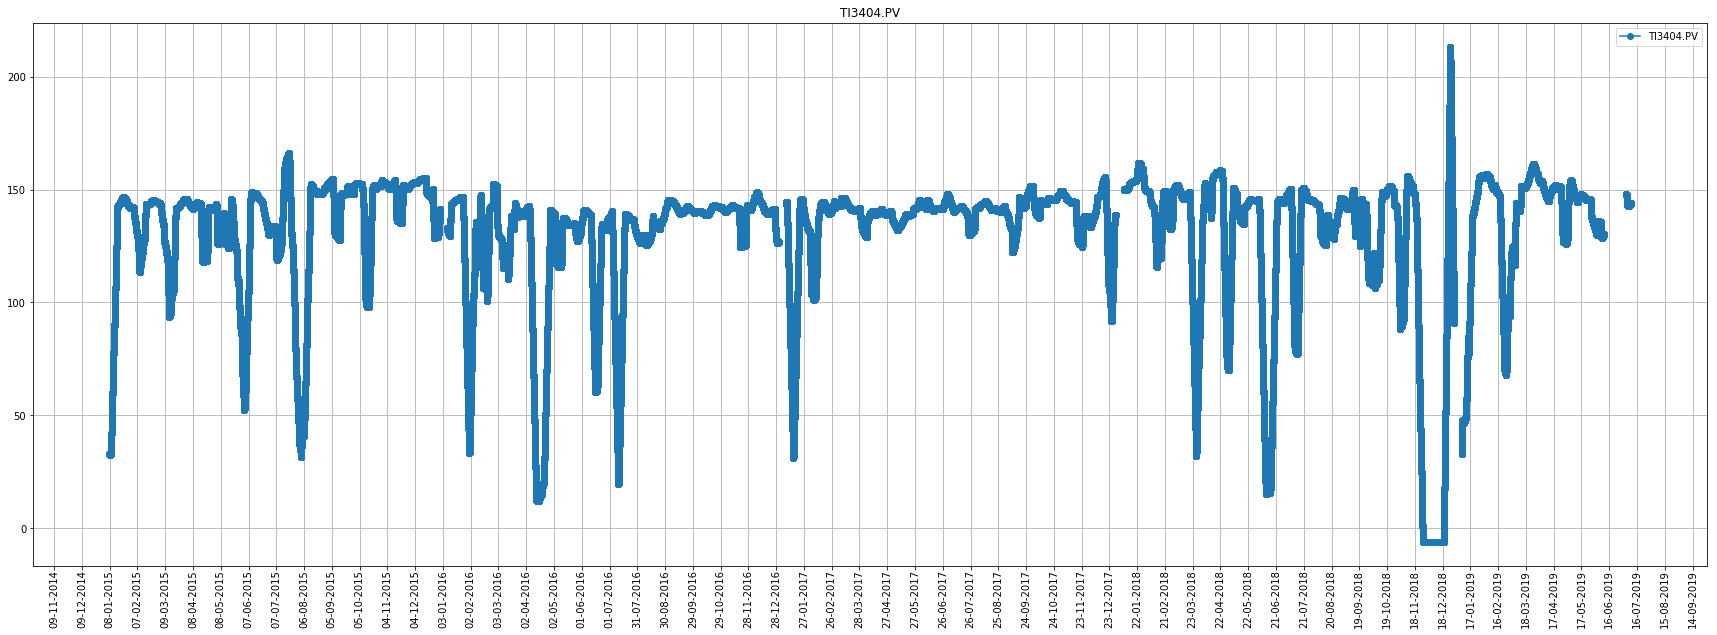

(5517491, 1)


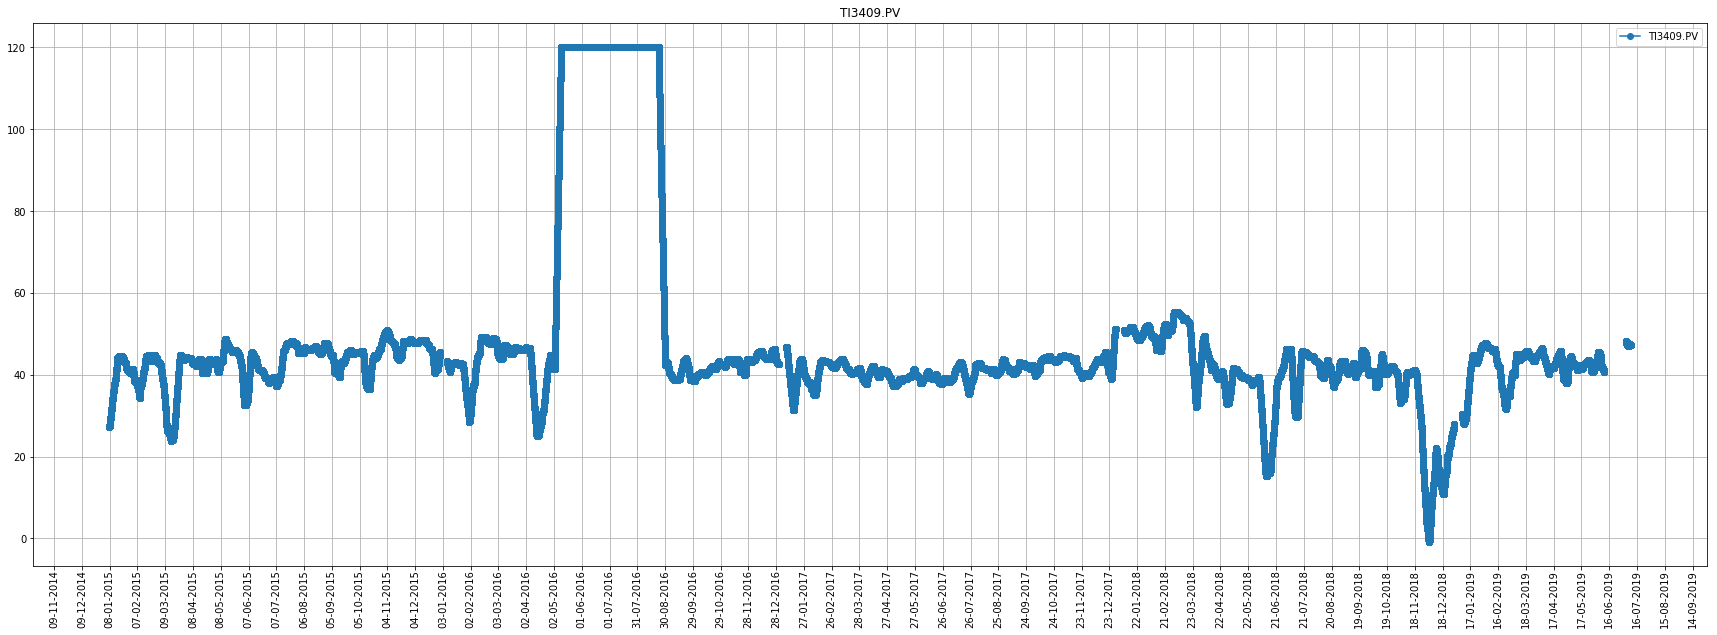

(5517491, 1)


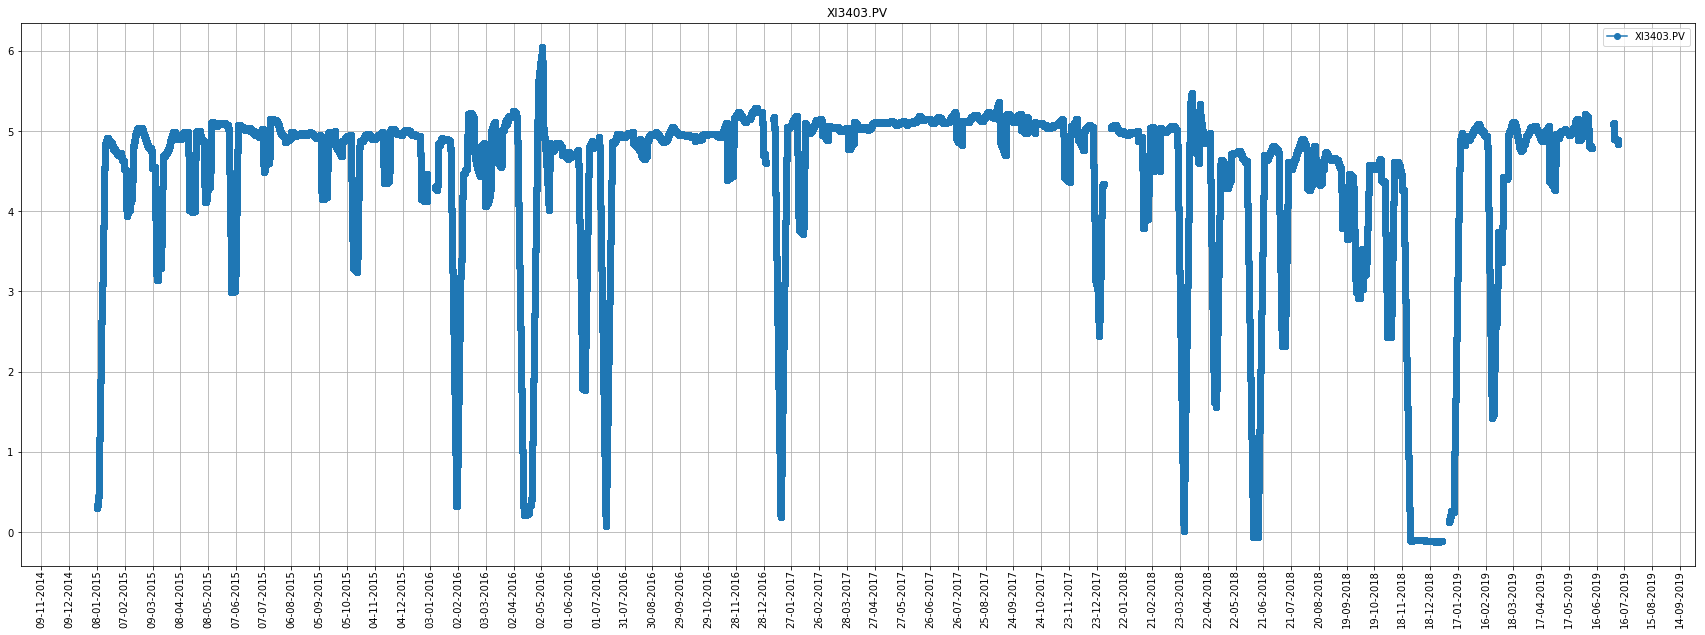

(5517491, 1)


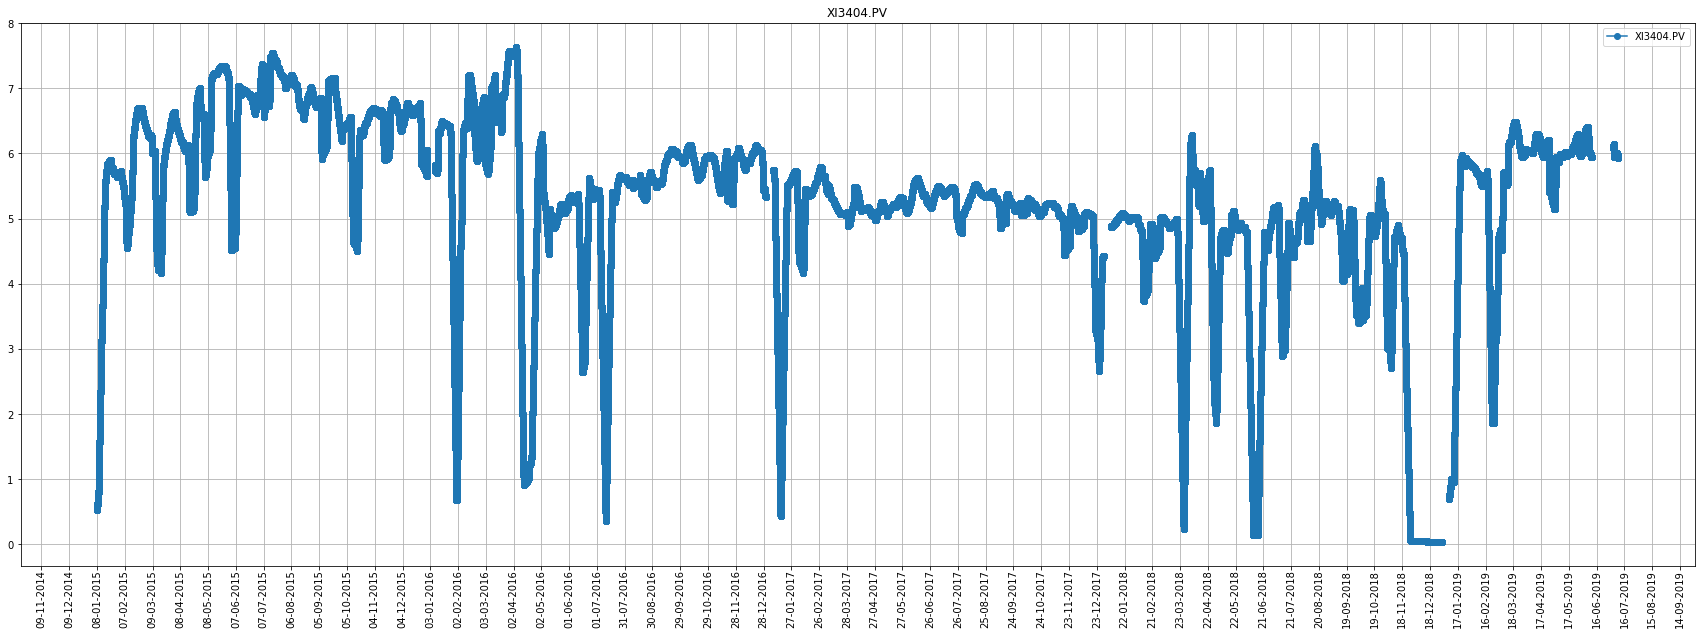

(5517491, 1)


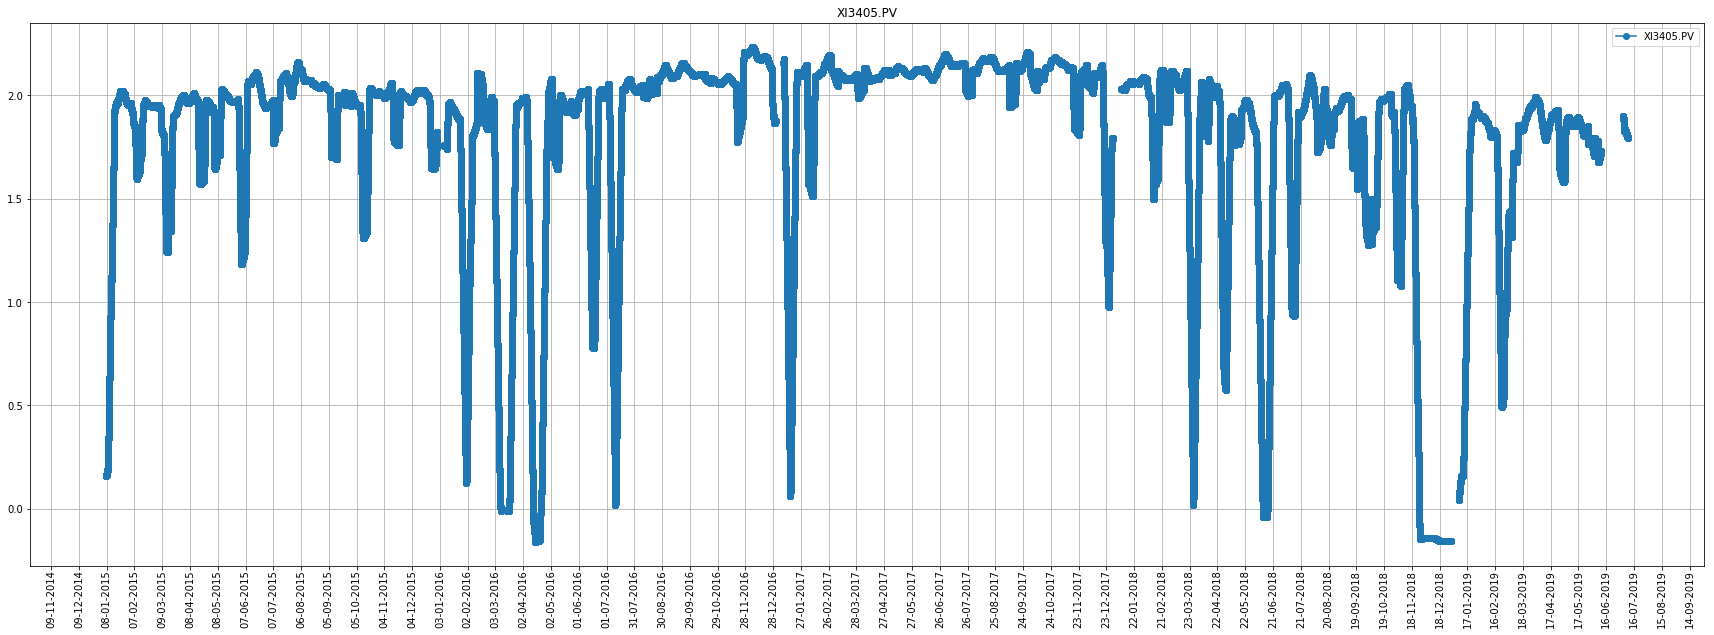

(5517491, 1)


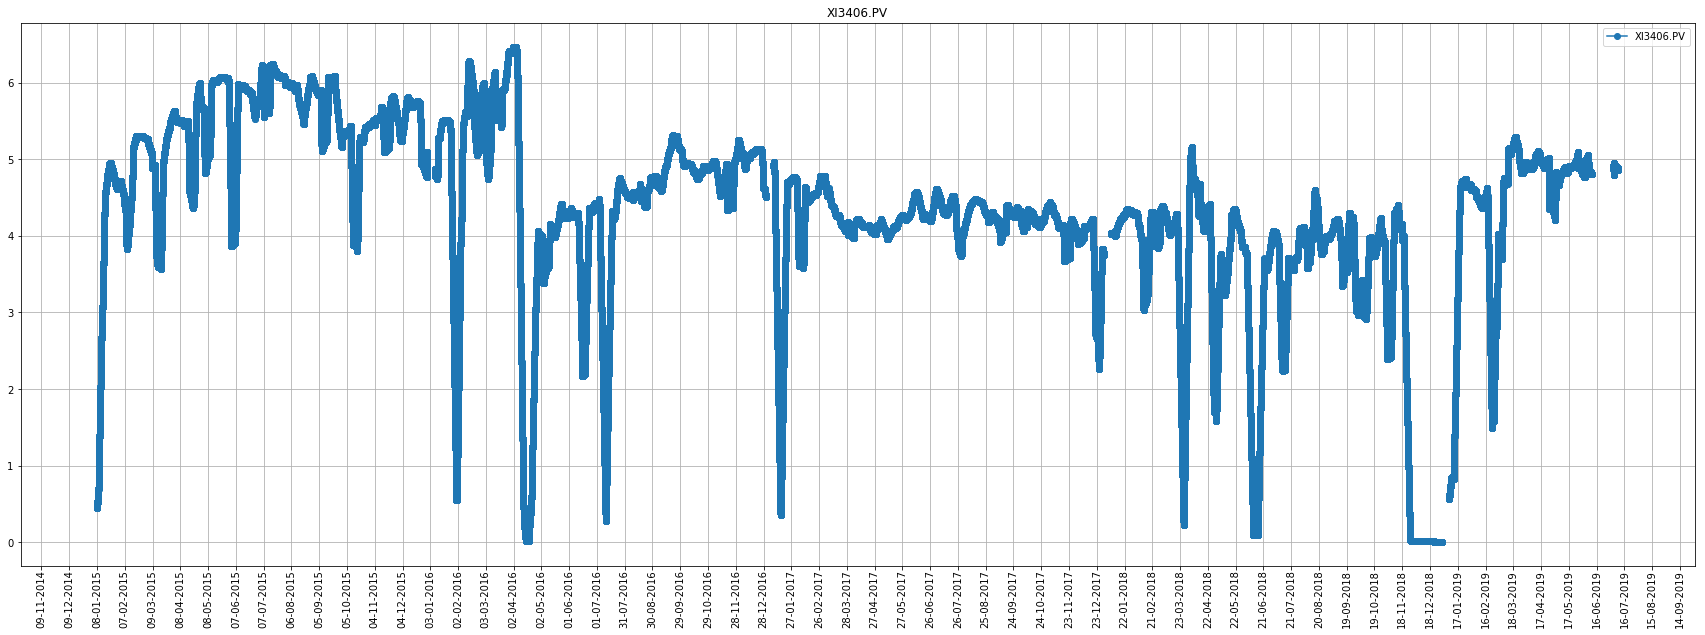

(5517491, 1)


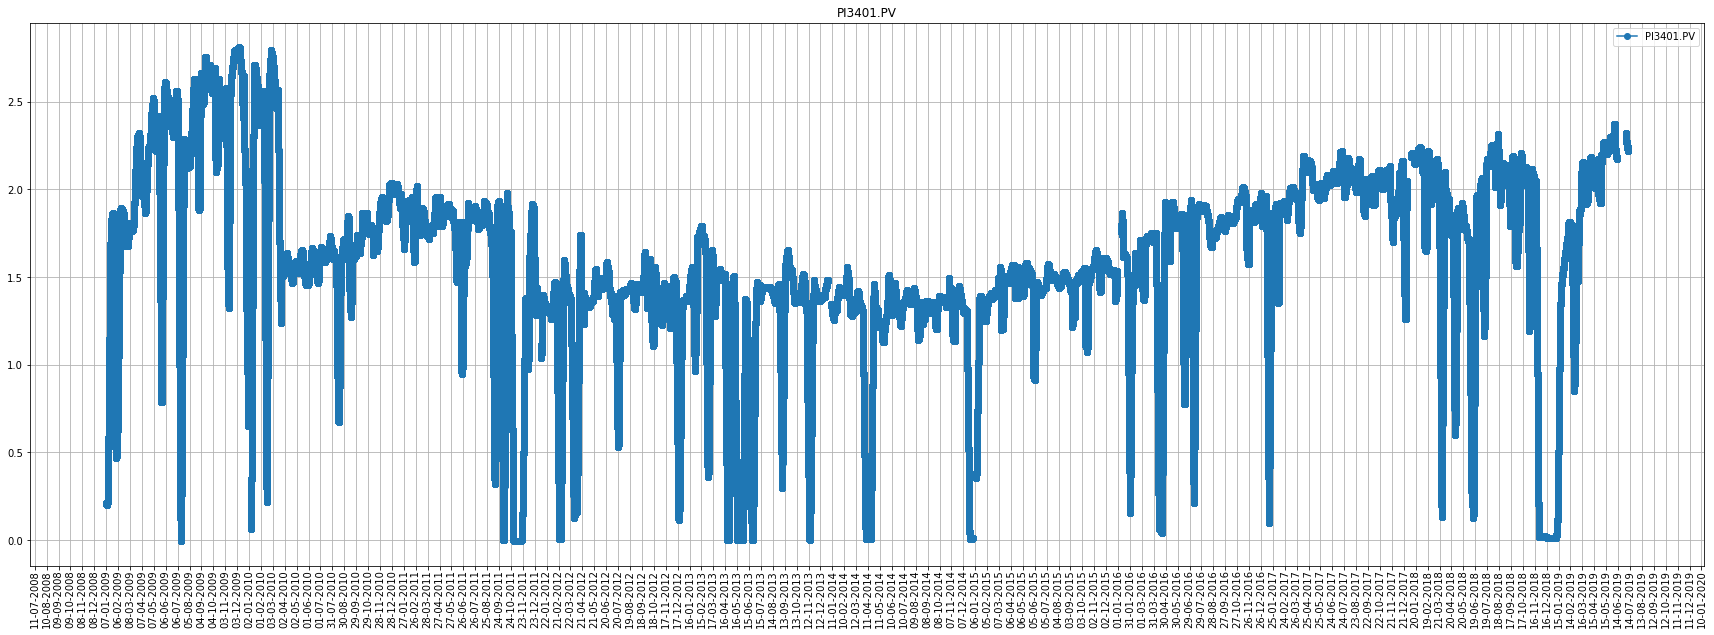

(5517491, 1)


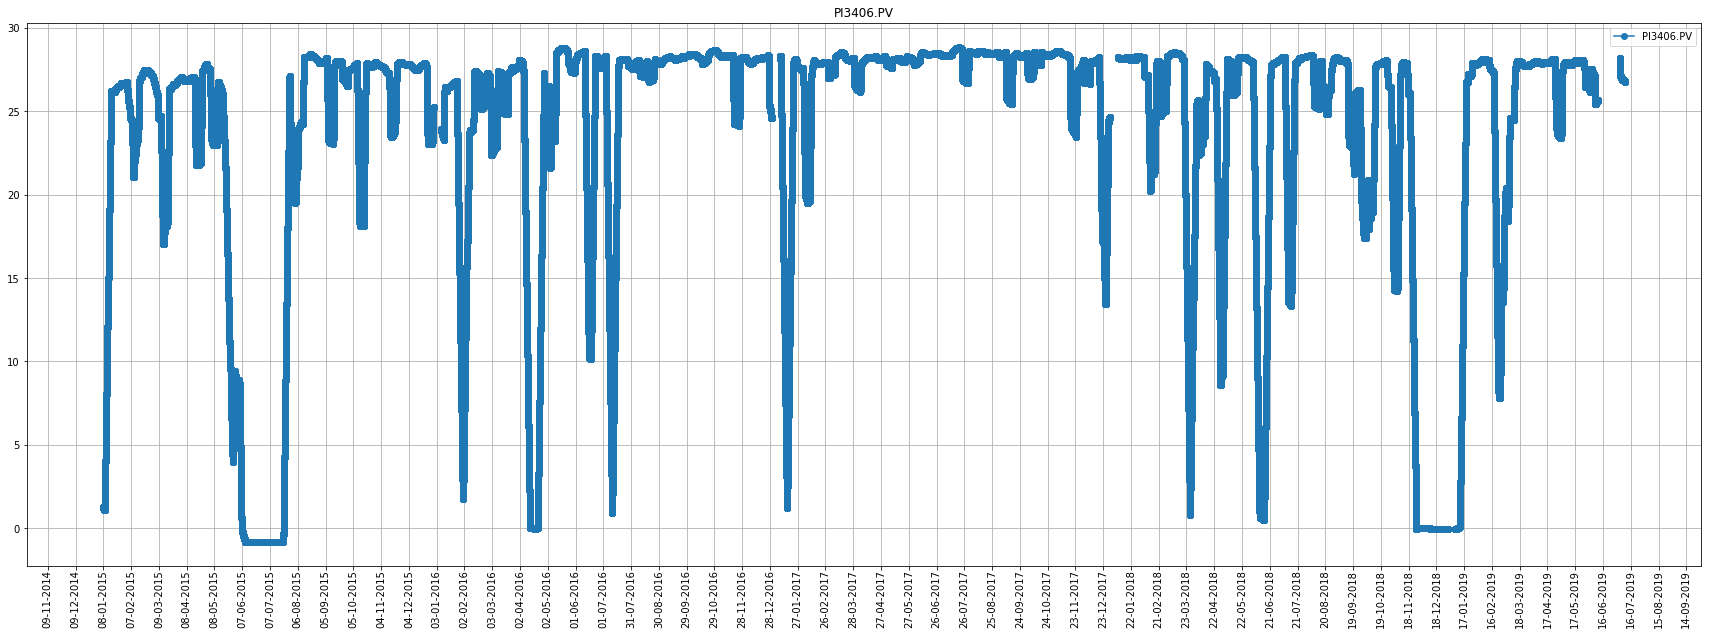

(5517491, 1)


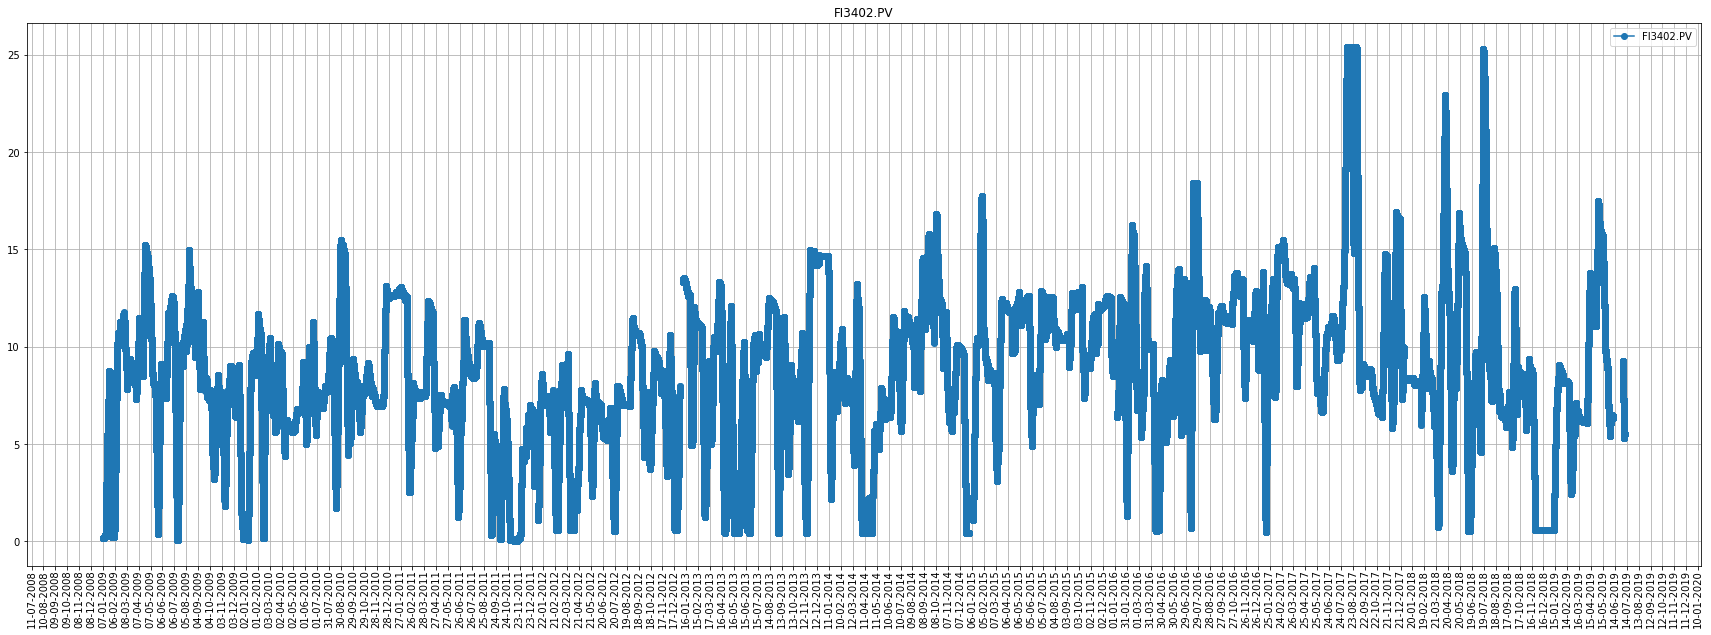

(5517491, 1)


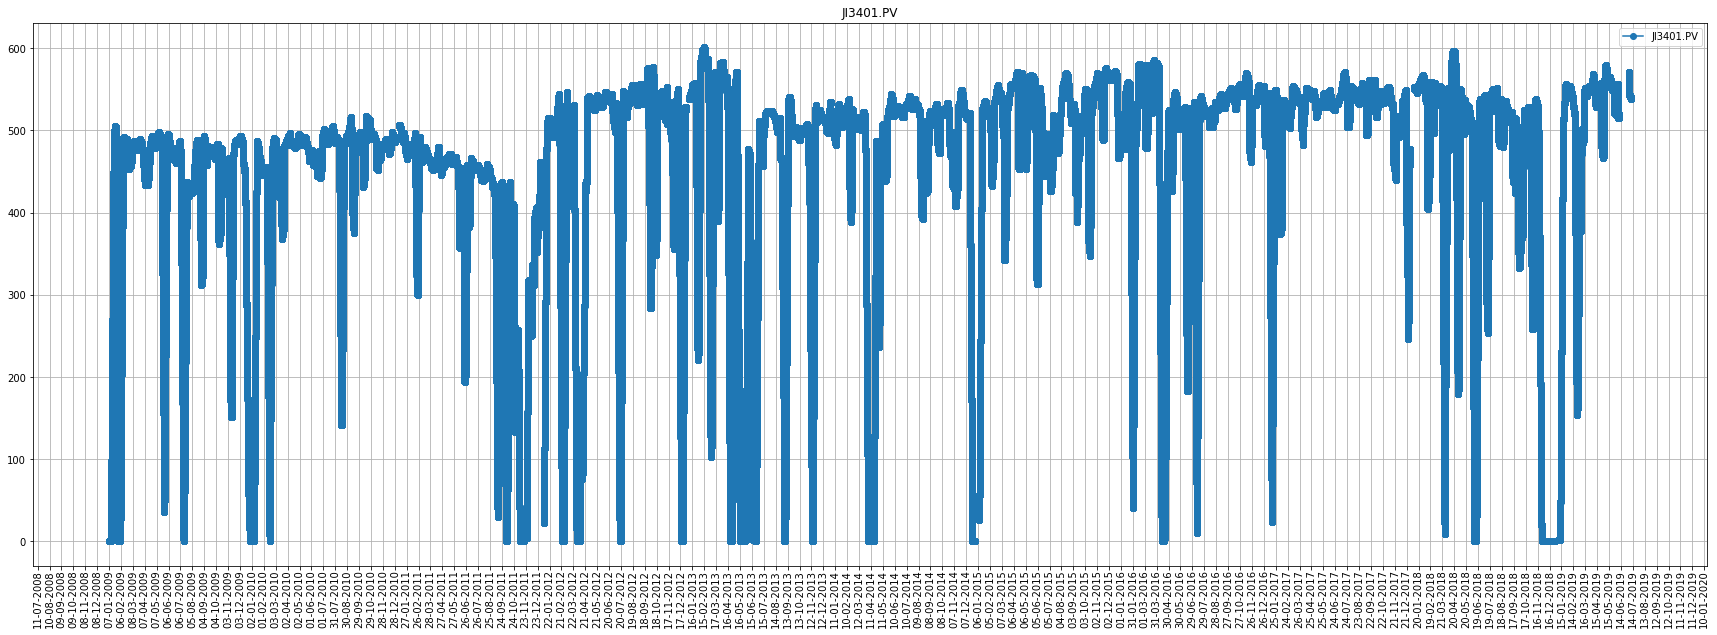

In [23]:
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]


for tag in tags[1:]:
    #plot_variables_rolling(data,[tag],legend=[tag],reference_line=[],
    #                       rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
    #                       minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
    
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,save_figure_name = tag+'.jpeg',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

### Boxplot

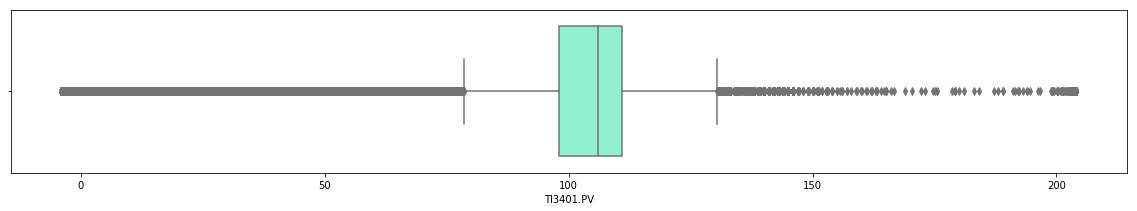

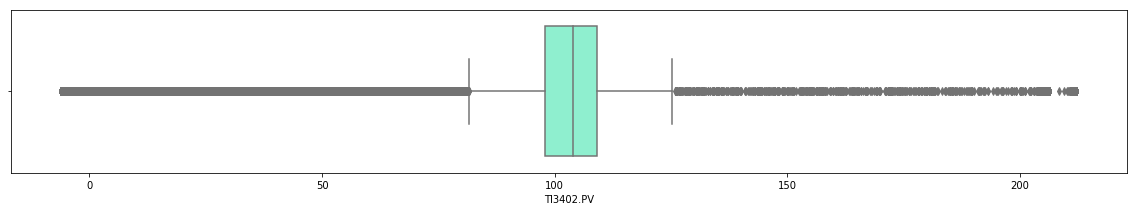

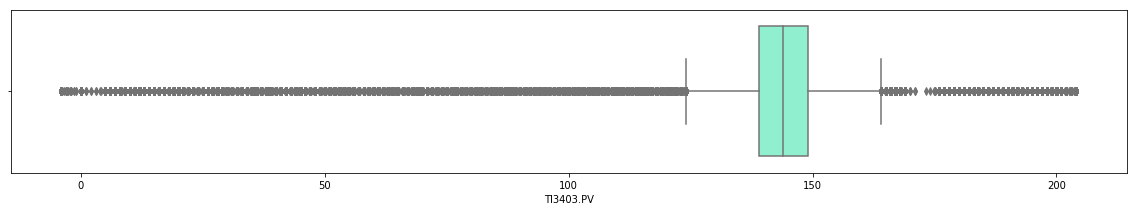

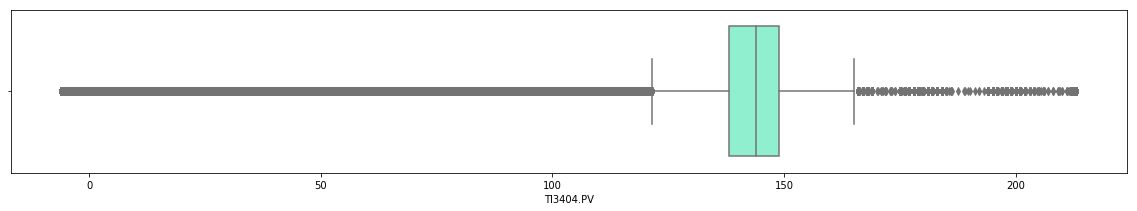

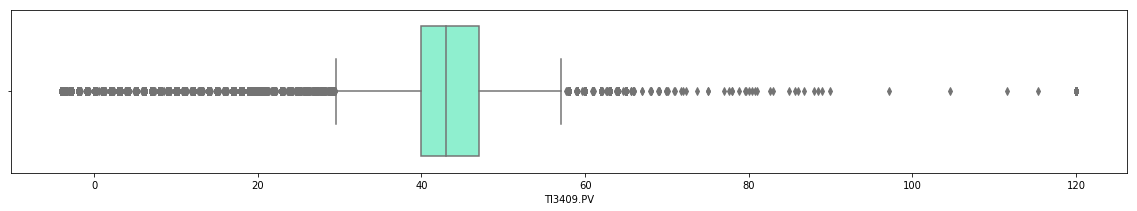

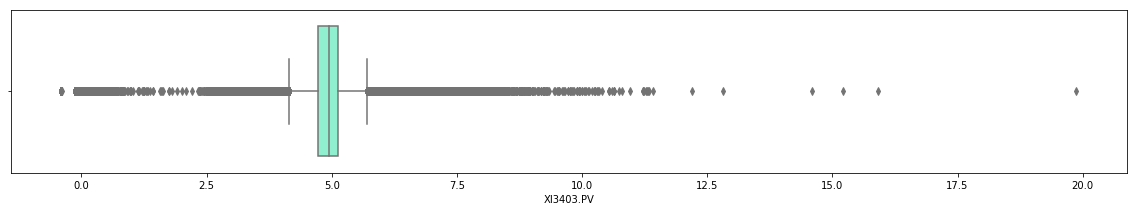

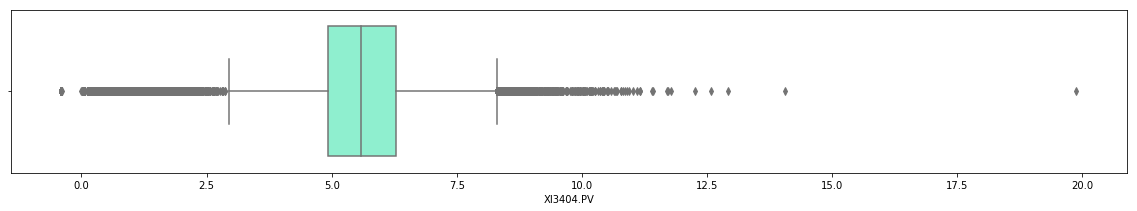

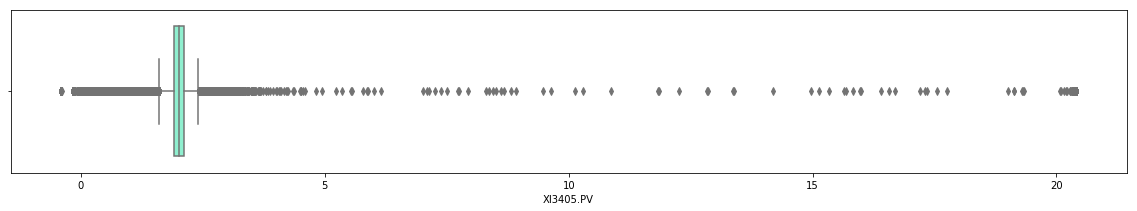

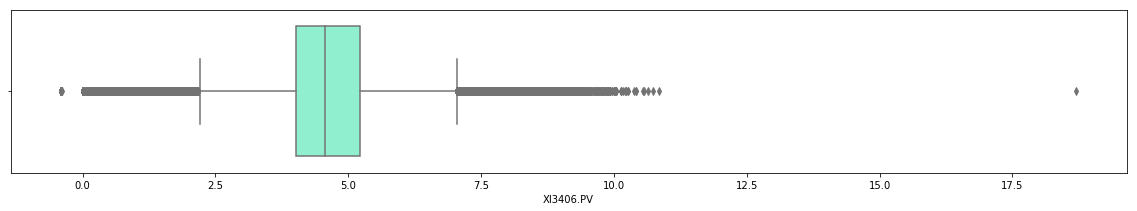

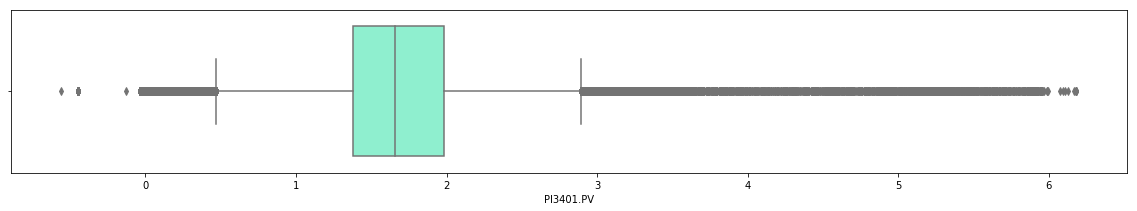

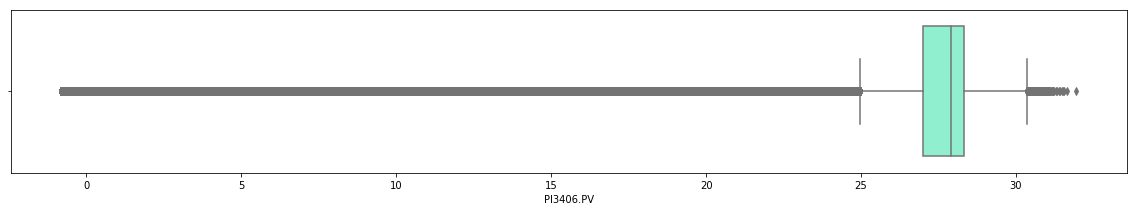

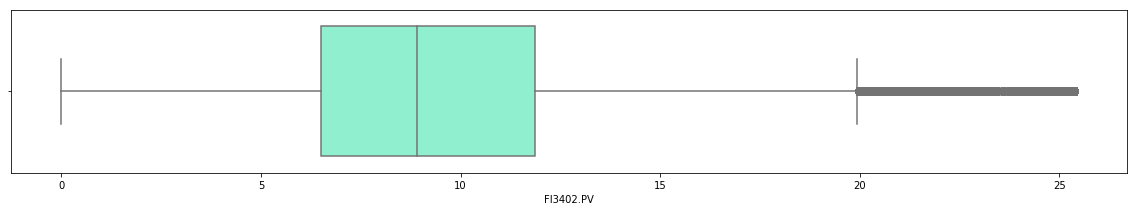

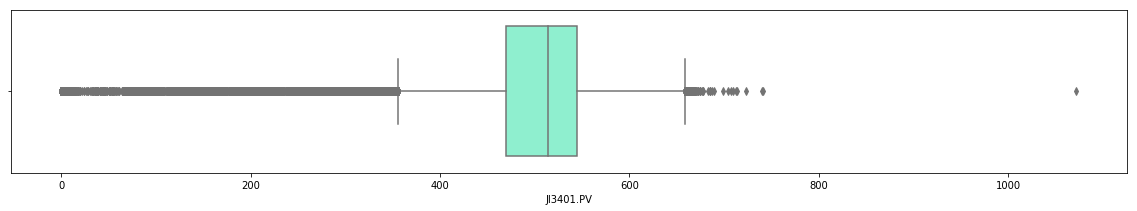

In [24]:
for tag in tags[1::]:
    fig, ax1 = plt.subplots(figsize = [20,3])
    sns.boxplot(data[tag], orient = 'h',  color = 'aquamarine')

### Temperatura de Descarga 1º Estágio

(5517491, 2)


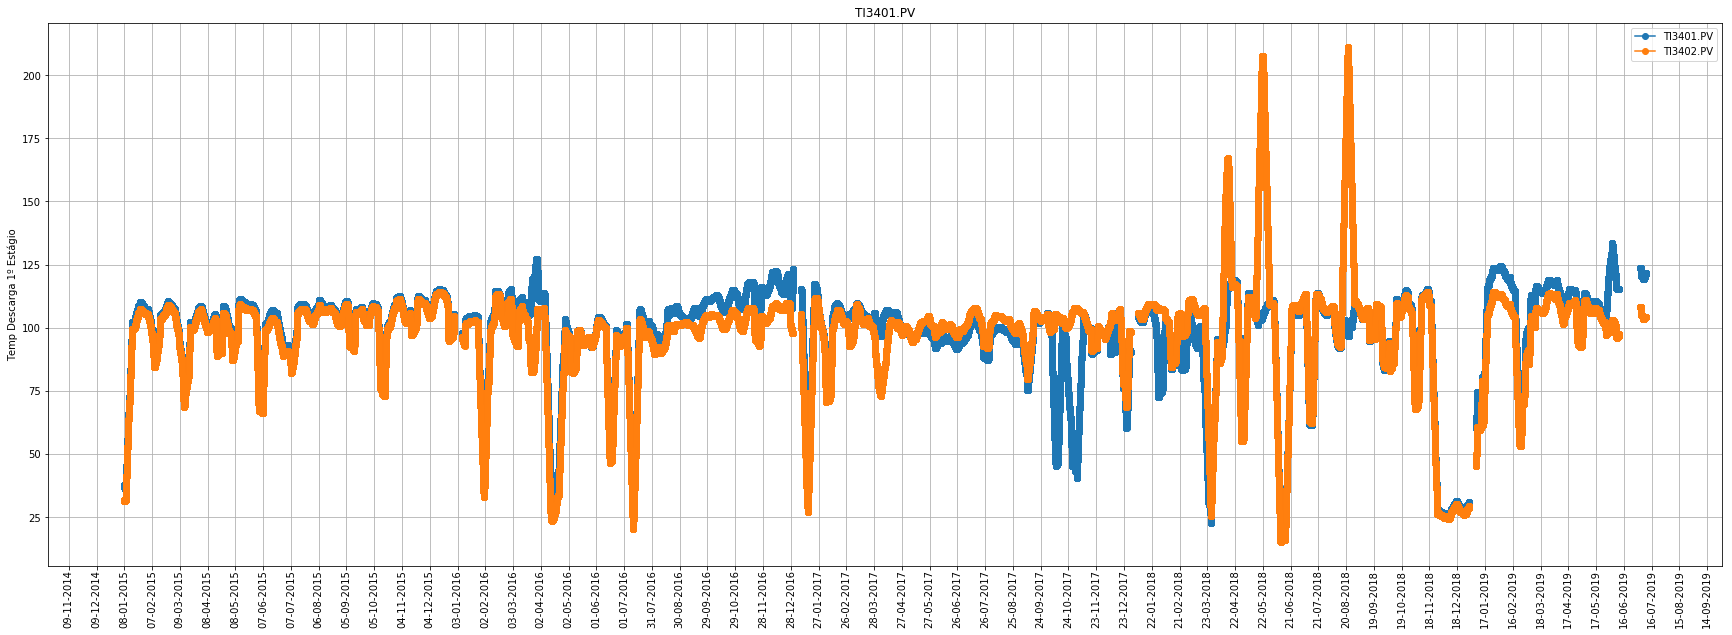

(5517491, 1)


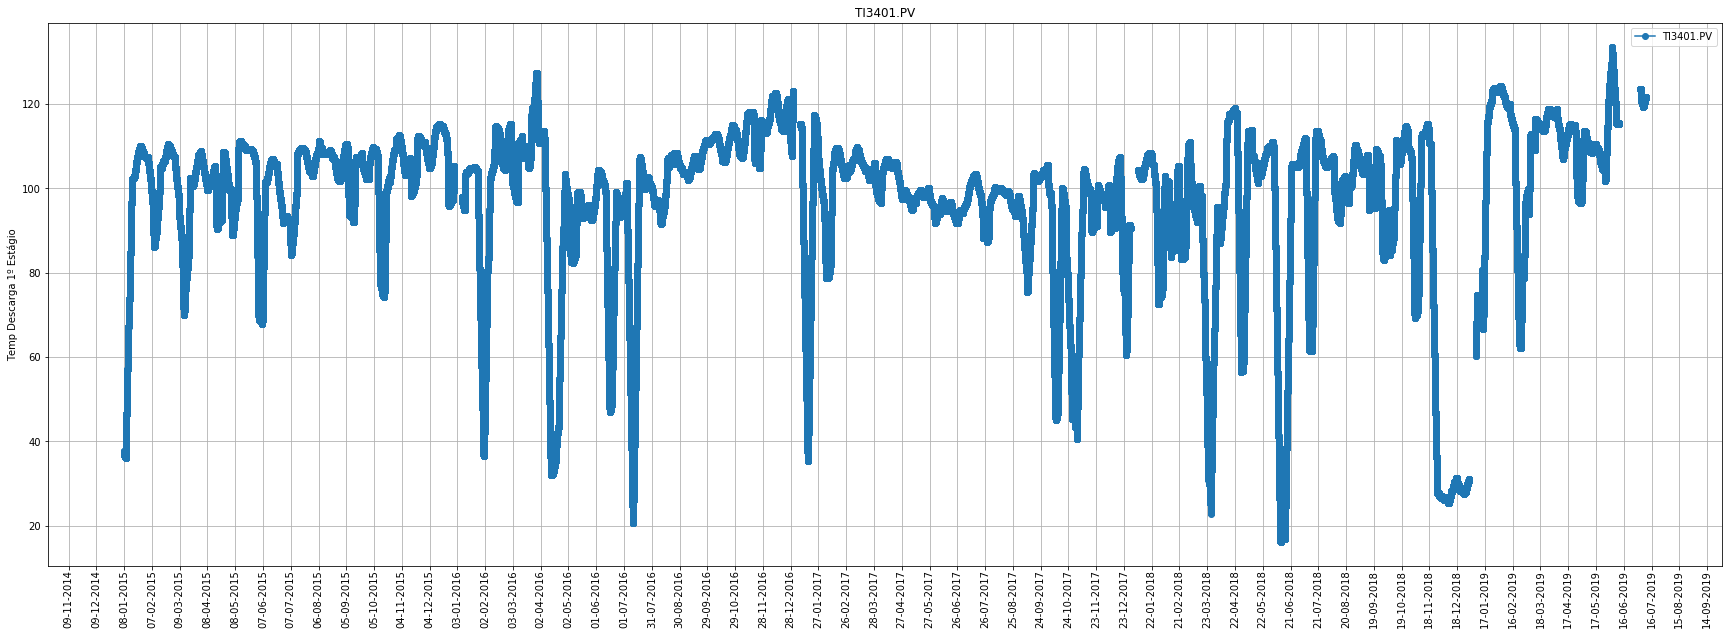

(5517491, 1)


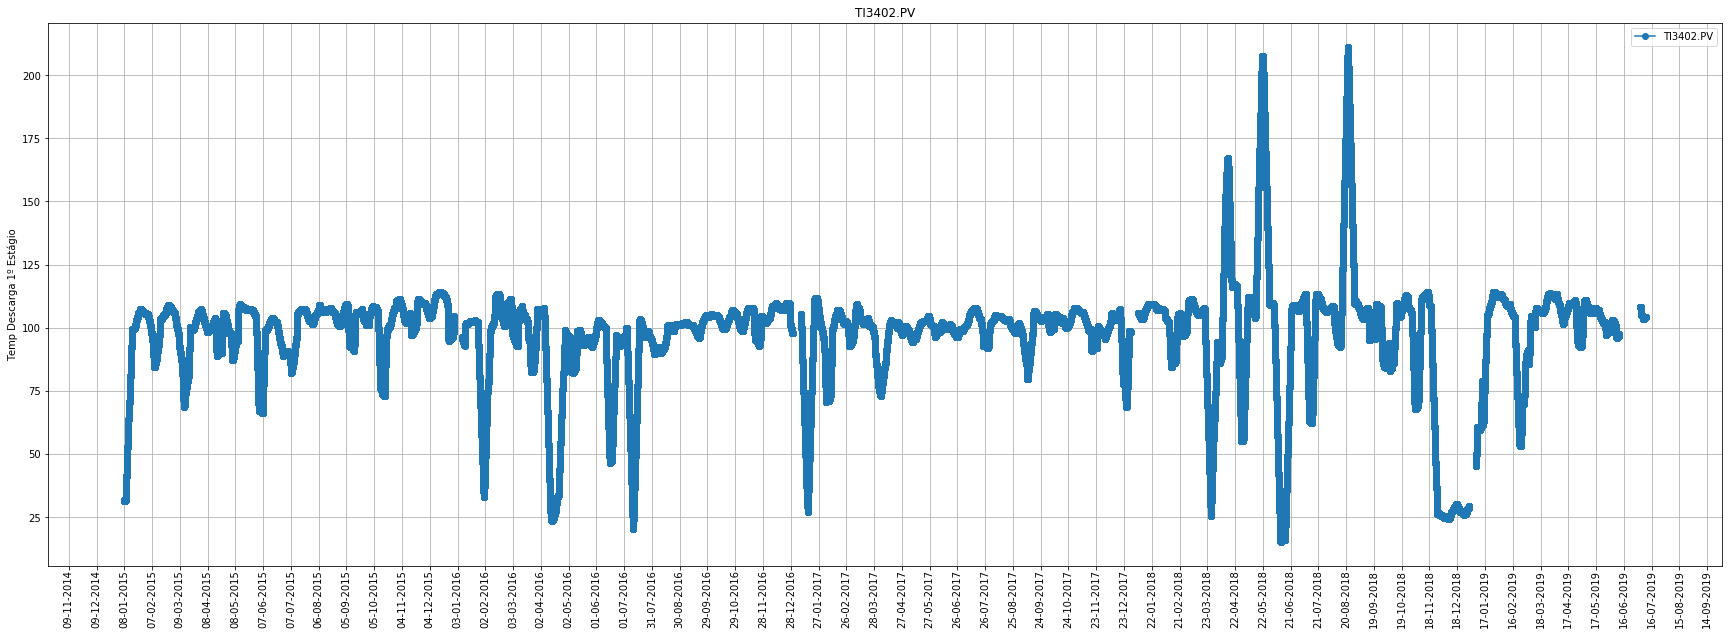

112.17916631698608


In [26]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
#tag faltante 'TI3405.PV'
tag_2 = ['TI3401.PV','TI3402.PV']

name = 'Temp Descarga 1º Estágio'

plot_variables_rolling_V2(data,tag_2,legend=tag_2,reference_line=[], ylabel=name,
                           rolling_time=roling,save_figure_name = name+'.jpeg',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

for tag in tag_2:
    
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[], ylabel=name,
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);



print(time.time() - tempo)

### Temperatura de Descarga 2º Estágio

(5517491, 1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


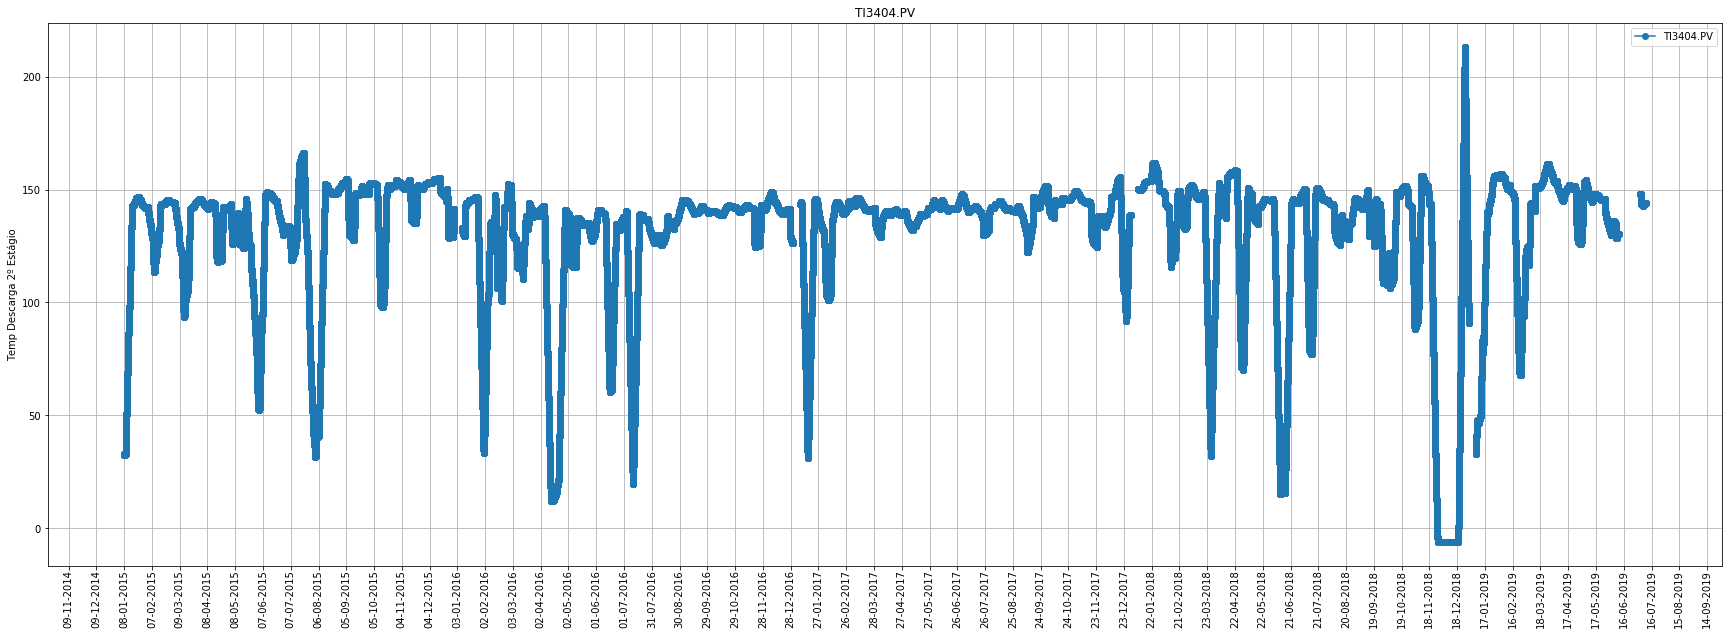

(5517491, 1)


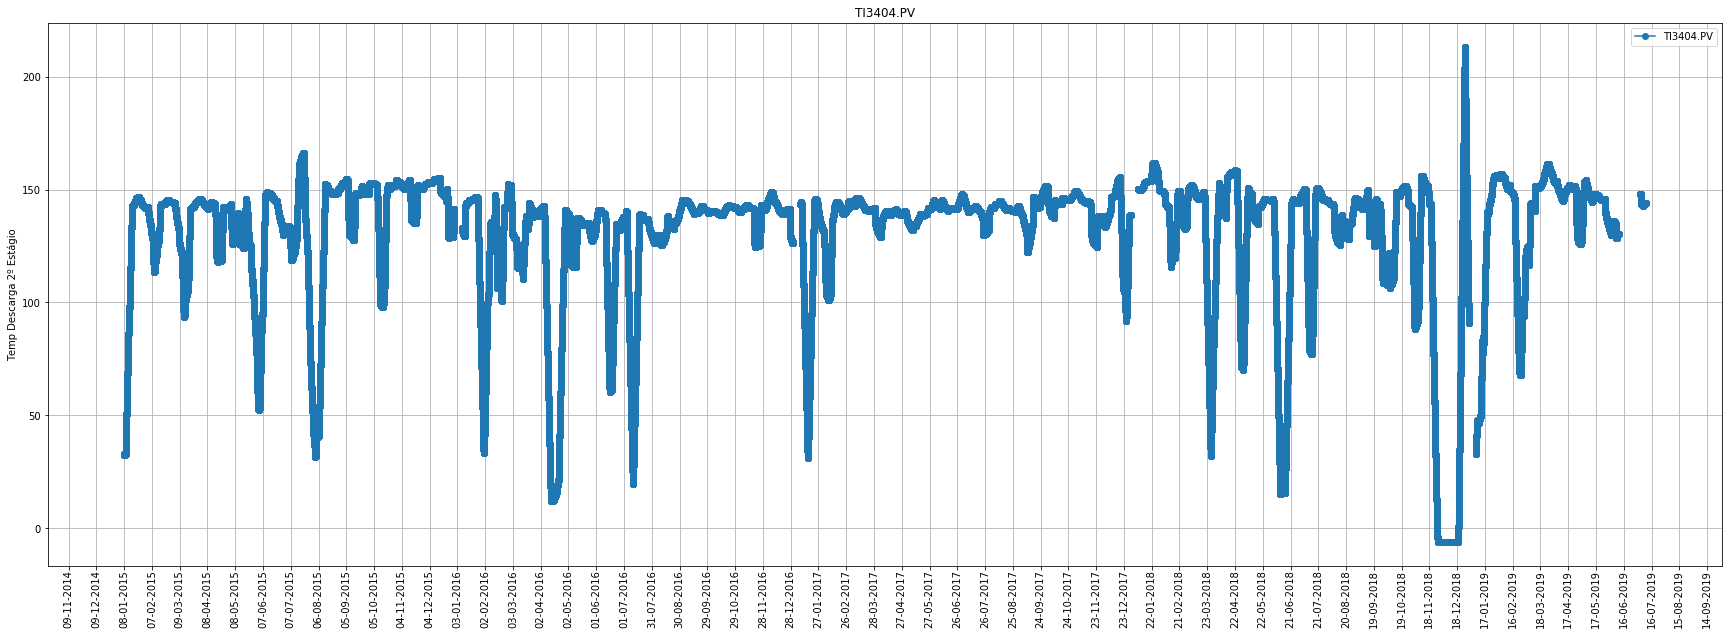

58.388166189193726


In [9]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
#tags faltante 'TI3408.PV'
tag_2 = ['TI3404.PV']
name = 'Temp Descarga 2º Estágio'

plot_variables_rolling_V2(data,tag_2,legend=tag_2,reference_line=[], ylabel=name,
                           rolling_time=roling,save_figure_name = name+'.jpeg',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

for tag in tag_2:
    
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[], ylabel=name,
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
print(time.time() - tempo)

### Temperatura de Sucção 1º Estágio

In [10]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]

#tag faltante 'TI3407.PV'
tag_2 = ['TI3407.PV']
name = 'Temp Sucção 1º Estágio'

plot_variables_rolling_V2(data,tag_2,legend=tag_2,reference_line=[], ylabel=name,
                           rolling_time=roling,save_figure_name = name+'.jpeg',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

for tag in tag_2:
    
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[], ylabel=name,
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);



print(time.time() - tempo)

KeyError: "None of [Index(['TI3407.PV'], dtype='object')] are in the [columns]"

### Temperatura de Sucção 2º Estágio 

(5517491, 1)


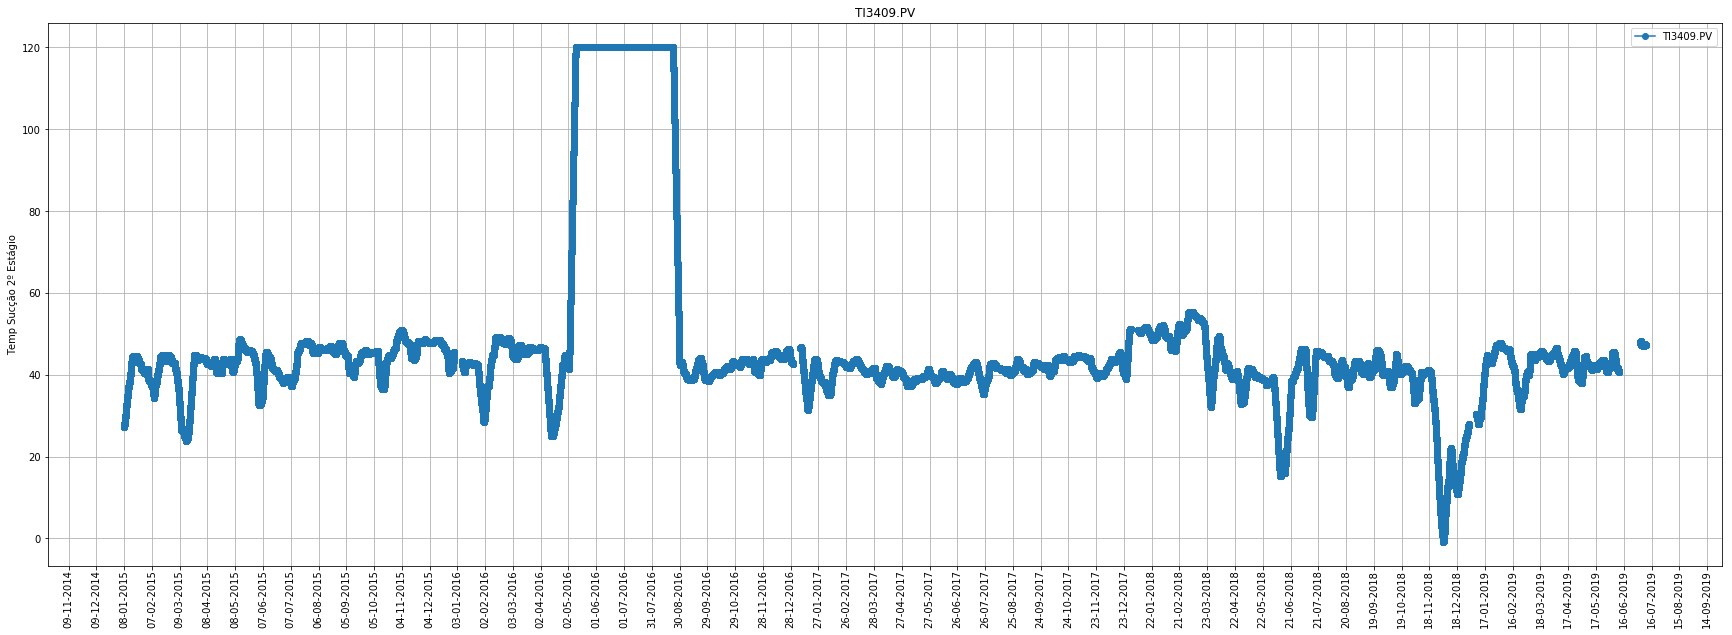

(5517491, 1)


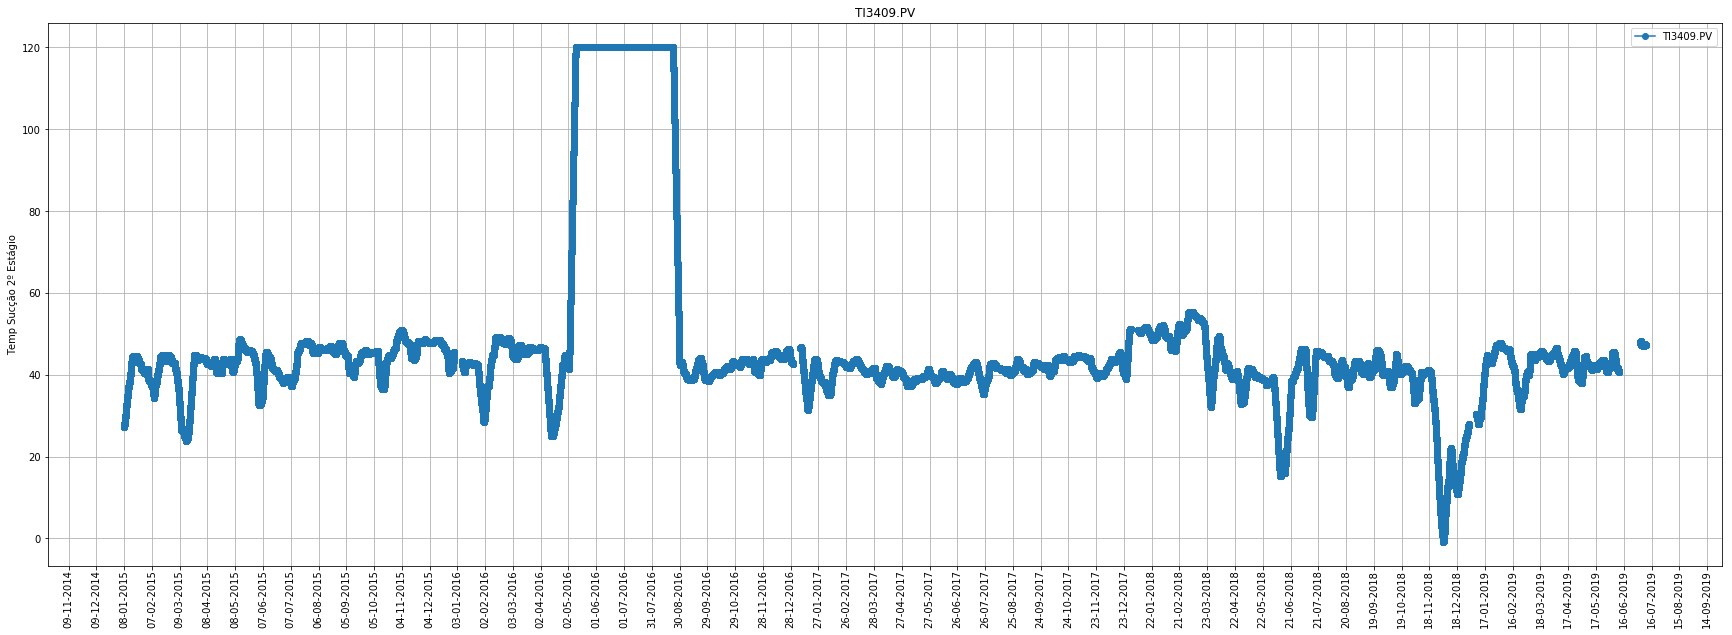

57.683324337005615


In [12]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
#tag faltante 'TI3406.PV'
tag_2 = ['TI3409.PV']
name = 'Temp Sucção 2º Estágio'

plot_variables_rolling_V2(data,tag_2,legend=tag_2,reference_line=[], ylabel=name,
                           rolling_time=roling,save_figure_name = name+'.jpeg',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

for tag in tag_2:
    
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[], ylabel=name,
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);




print(time.time() - tempo)

### Eteno

(5517491, 1)


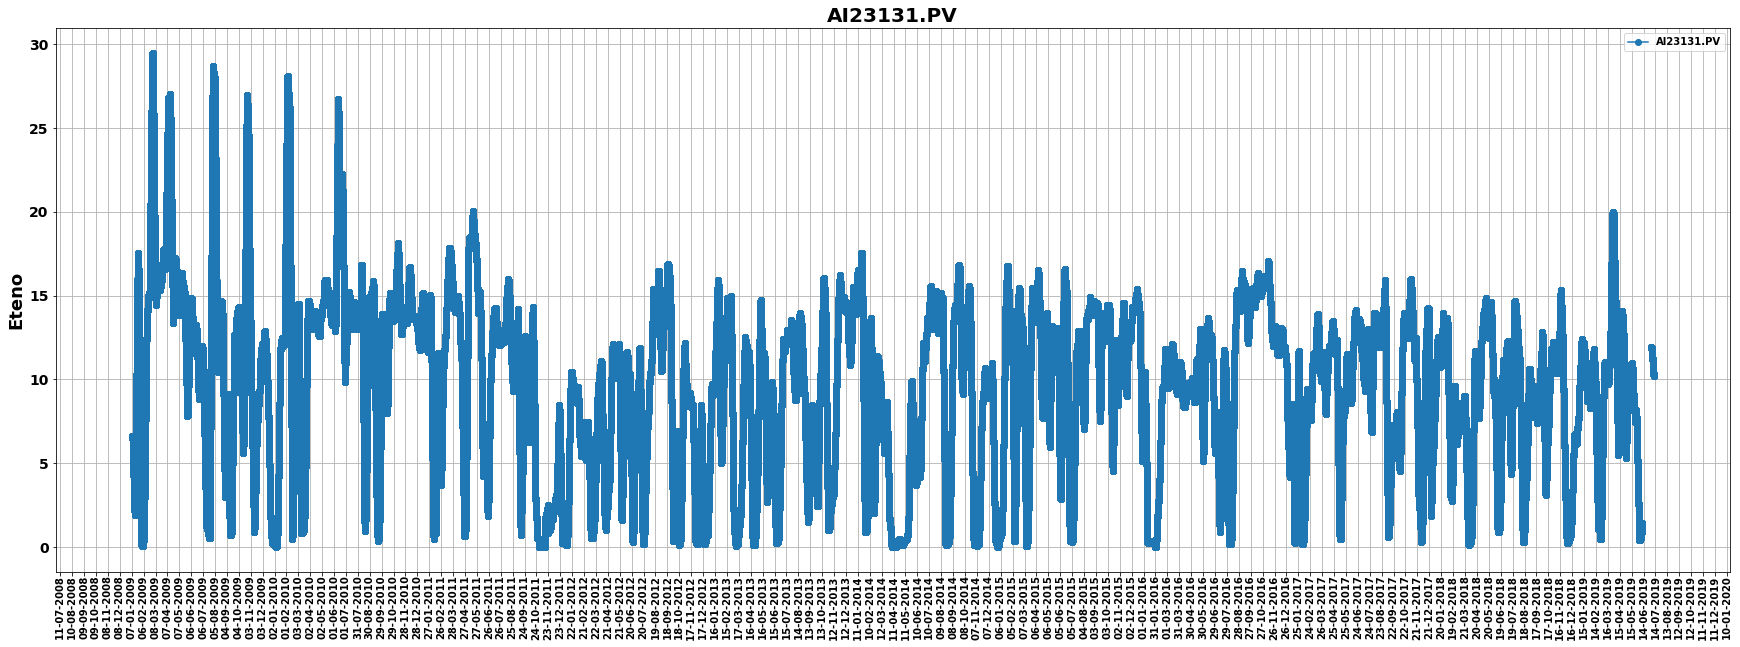

82.03730392456055


In [172]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]

#falta a tag 'AI23121.PV'

tag_2 = ['AI25131.PV']

plot_variables_rolling(data,tag_2,legend=tag_2,reference_line=[], ylabel='Eteno',
                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

#for tag in tag_2:
#    
#    plot_variables_rolling(data,[tag],legend=[tag],reference_line=[], ylabel='Eteno',
#                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
#                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
#
#

print(time.time() - tempo)

### Propeno / Propano

(5517491, 1)


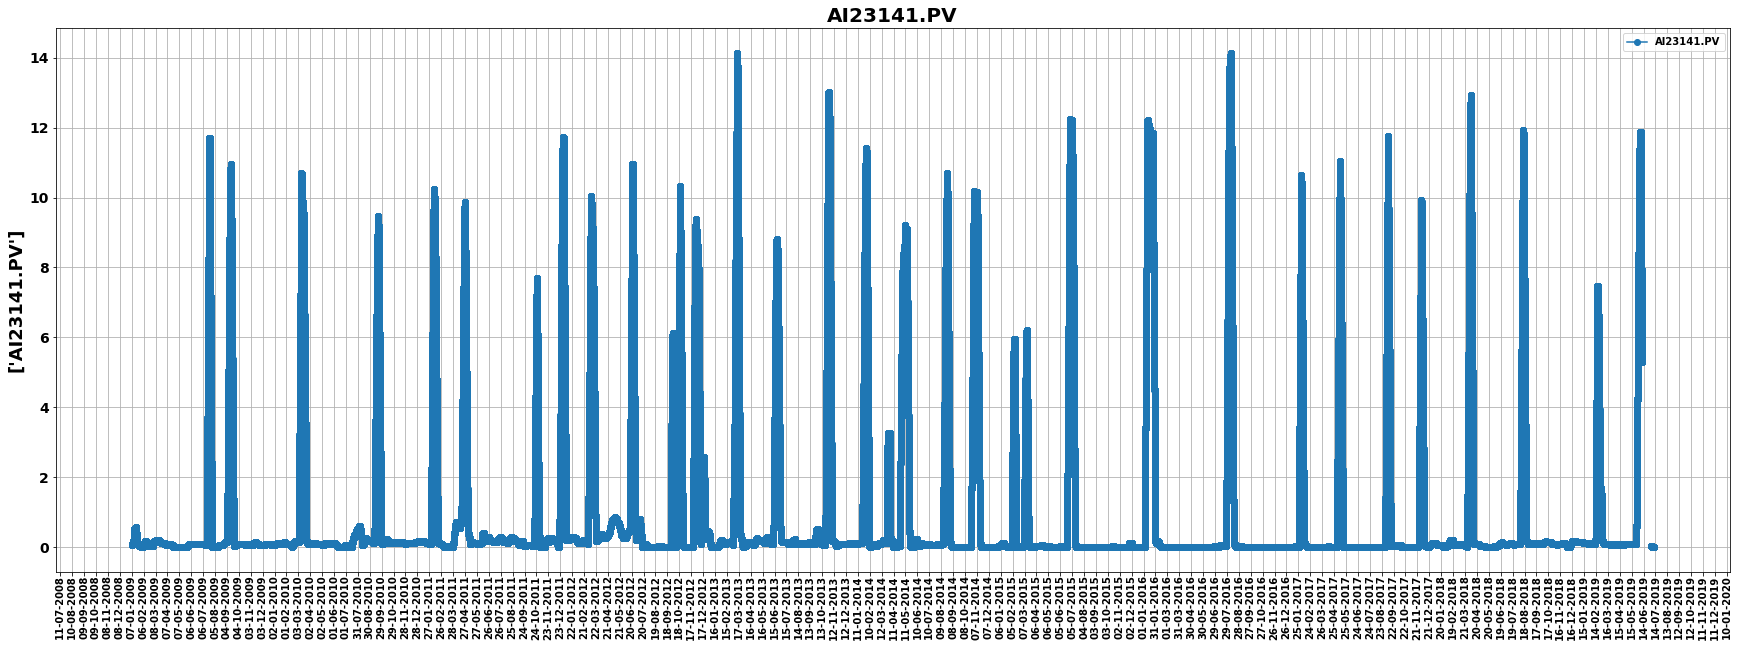

(5517491, 1)


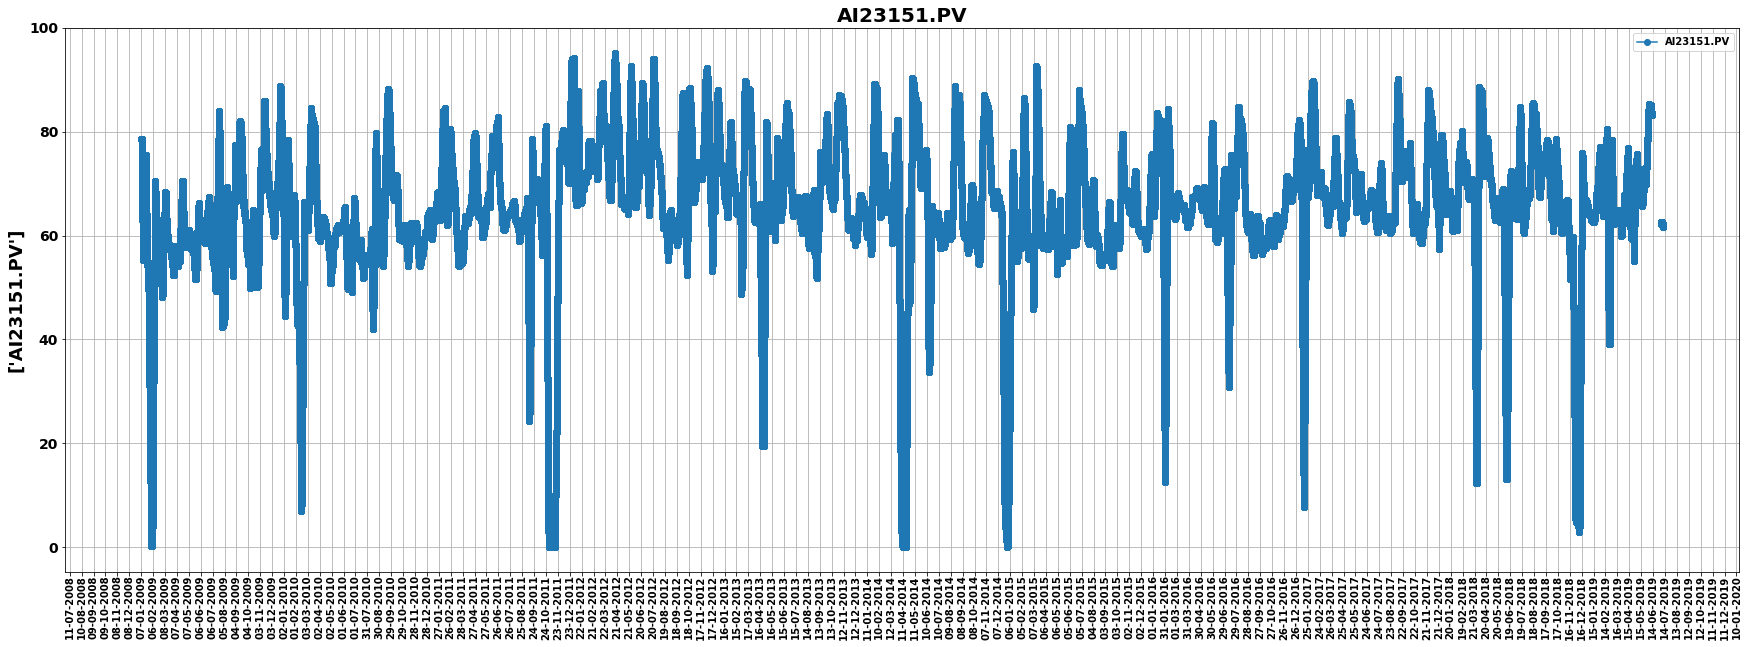

175.86028814315796


In [208]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]

tag_2 = ['AI23141.PV', 'AI23151.PV']

#plot_variables_rolling(data,tag_2,legend=tag_2,reference_line=[], ylabel='Propeno',
#                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
#                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
#
for tag in tag_2:
    
    plot_variables_rolling(data,[tag],legend=[tag],reference_line=[], ylabel=[tag],
                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);



print(time.time() - tempo)

### Buteno / Butano

(5517491, 1)


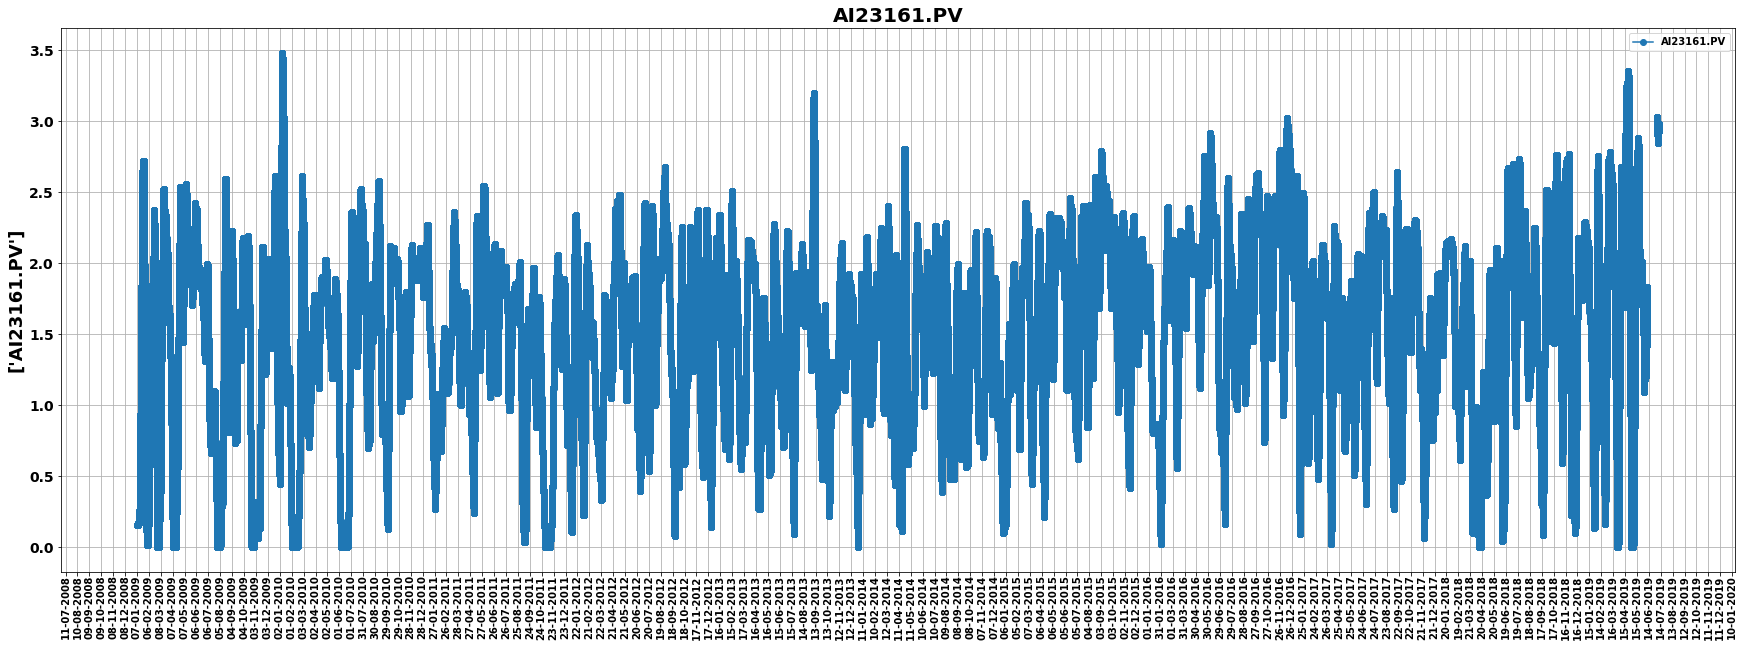

(5517491, 1)


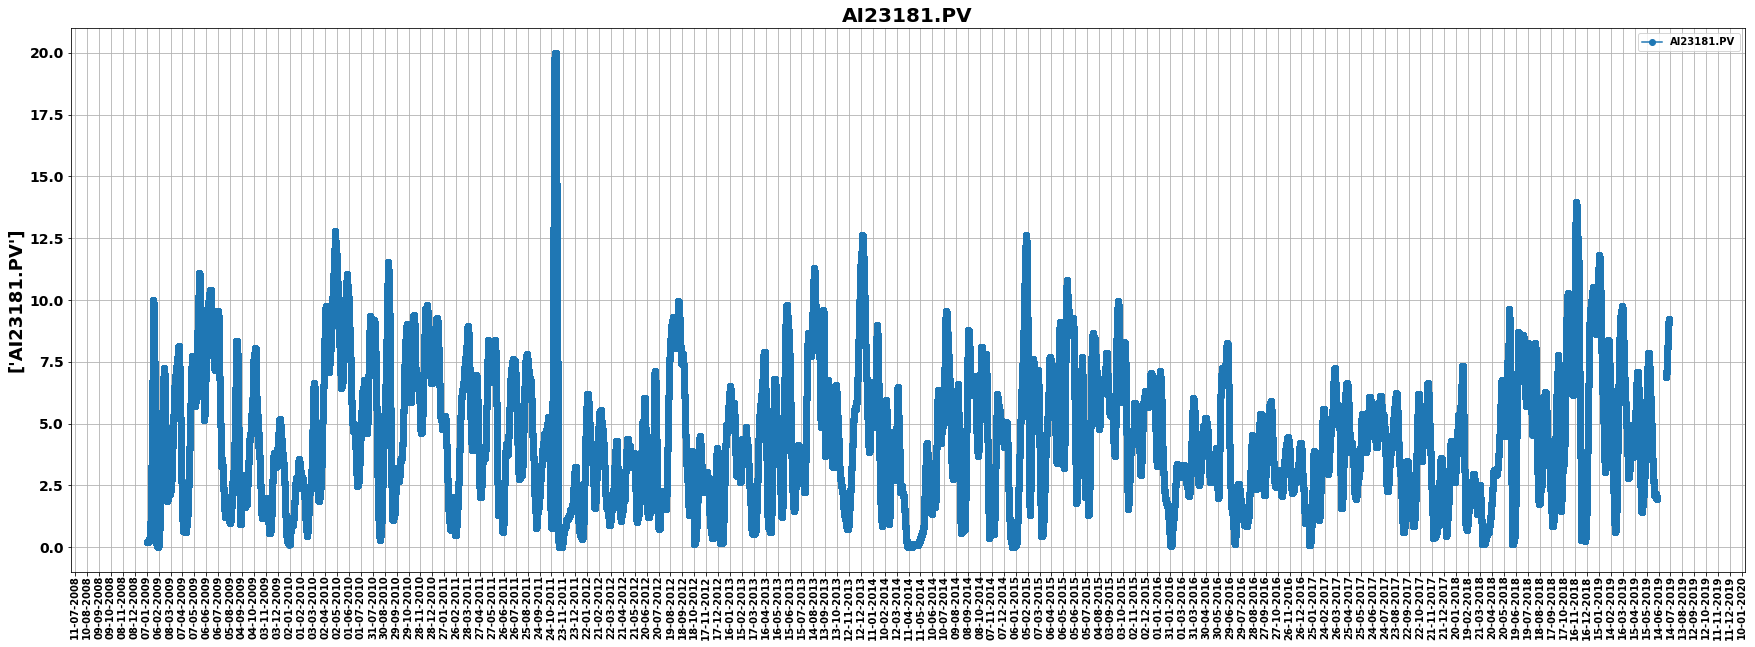

193.43057417869568


In [209]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]

tag_2 = ['AI23161.PV', 'AI23181.PV']

#plot_variables_rolling(data,tag_2,legend=tag_2,reference_line=[], ylabel='Buteno',
#                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
#                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
#
for tag in tag_2:
    
    plot_variables_rolling(data,[tag],legend=[tag],reference_line=[], ylabel=[tag],
                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);



print(time.time() - tempo)

### Hexano / Hexeno

(5517491, 1)


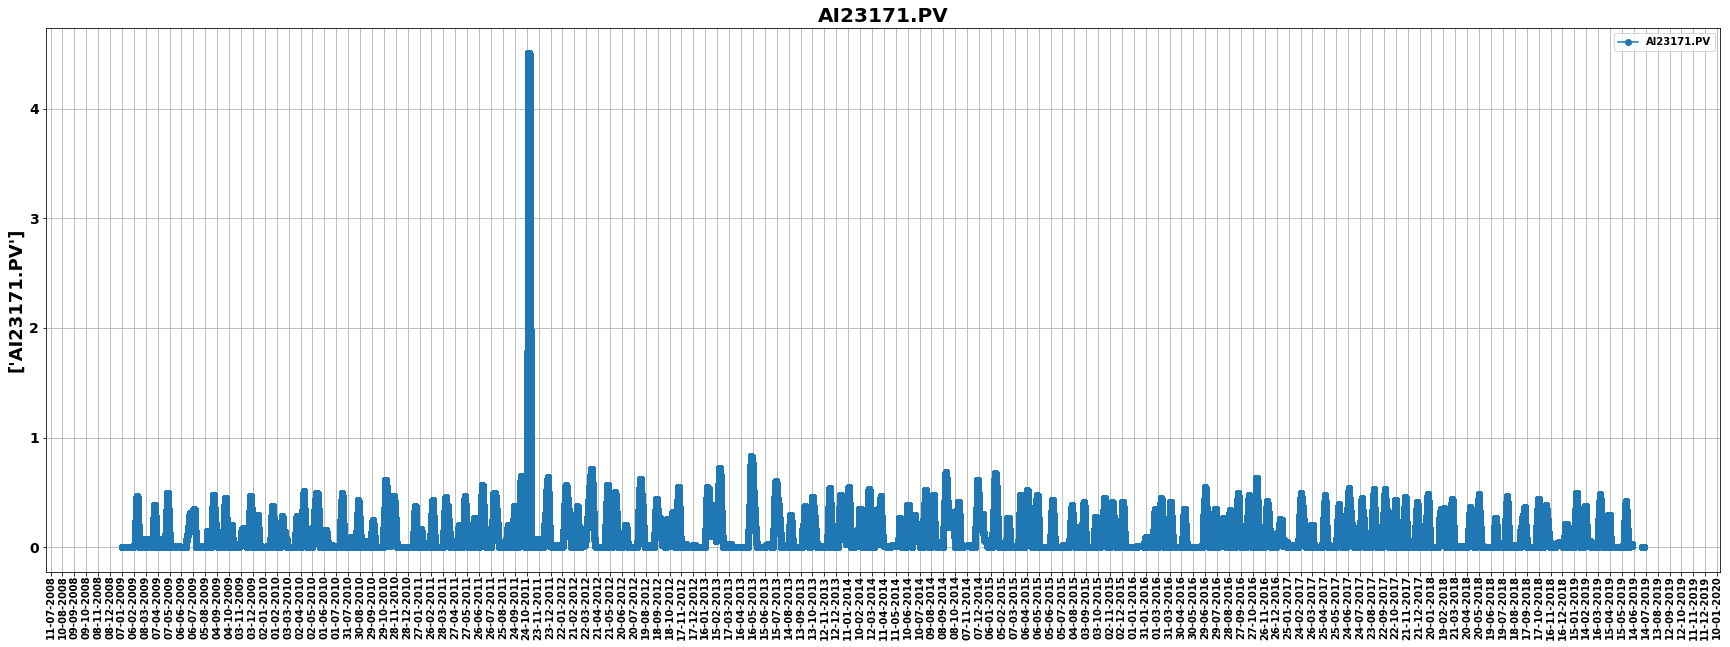

(5517491, 1)


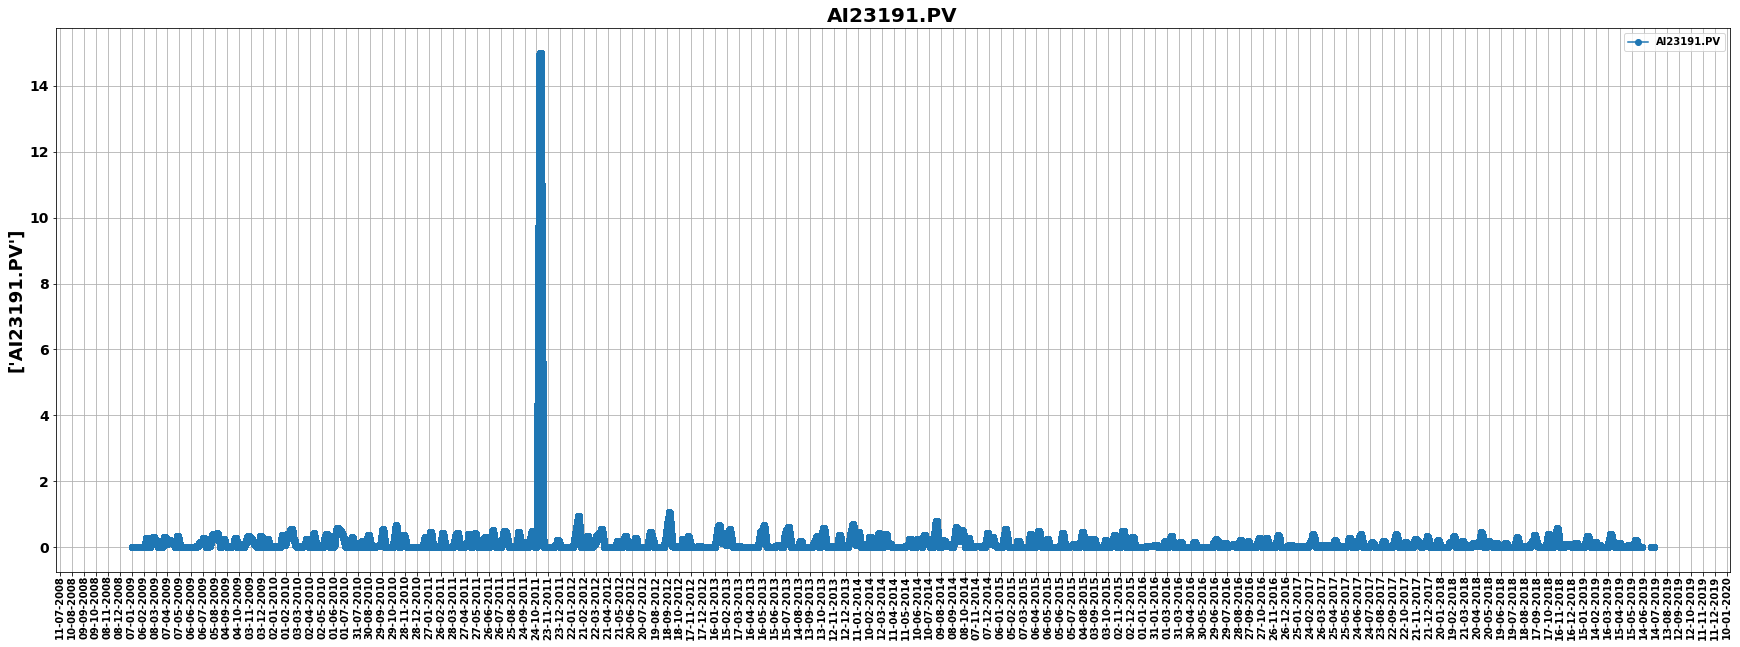

187.29682755470276


In [213]:
tempo = time.time()
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]

tag_2 = ['AI23171.PV', 'AI23191.PV']

#plot_variables_rolling(data,tag_2,legend=tag_2,reference_line=[], ylabel='Hexeno',
#                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
#                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);
#
for tag in tag_2:
    
    plot_variables_rolling(data,[tag],legend=[tag],reference_line=[], ylabel=[tag],
                           rolling_time=roling,save_figure_name = tag+'.jpeg', save_figure_dir='',
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);



print(time.time() - tempo)